# 01. Cleaning and EDA

In [2]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#!pip install folium
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from ydata_profiling import ProfileReport

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

C:\Users\mboll\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\mboll\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


## Objectives of the project
- Understanding which factors are responsible for higher property value - 650K dollars and above
- Predict the price of a house based on the features provided in the dataset

## Import the data

In [3]:
data = pd.read_csv("../00-Initial_data_and_instructions/regression_data.csv")
data.head()

7129300520 10/13/14  3     1  1180    5650  1.1  0  0.1  3.1   7  1180.1  \
0  6414100192  12/9/14  3  2.25  2570    7242  2.0  0    0    3   7    2170   
1  5631500400  2/25/15  2  1.00   770   10000  1.0  0    0    3   6     770   
2  2487200875  12/9/14  4  3.00  1960    5000  1.0  0    0    5   7    1050   
3  1954400510  2/18/15  3  2.00  1680    8080  1.0  0    0    3   8    1680   
4  7237550310  5/12/14  4  4.50  5420  101930  1.0  0    0    3  11    3890   

    0.2  1955   0.3  98178  47.5112  -122.257  1340  5650.1   221900  
0   400  1951  1991  98125  47.7210  -122.319  1690    7639   538000  
1     0  1933     0  98028  47.7379  -122.233  2720    8062   180000  
2   910  1965     0  98136  47.5208  -122.393  1360    5000   604000  
3     0  1987     0  98074  47.6168  -122.045  1800    7503   510000  
4  1530  2001     0  98053  47.6561  -122.005  4760  101930  1230000

In [5]:
# The names of the columns can be obtained from the excel file
cols = [
    "id", 
    "date", 
    "bedrooms", 
    "bathrooms", 
    "sqft_living", 
    "sqft_lot", 
    "floors", 
    "waterfront", 
    "view", 
    "condition", 
    "grade", 
    "sqft_above", 
    "sqft_basement", 
    "yr_built", 
    "yr_renovated", 
    "zipcode", 
    "lat", 
    "long", 
    "sqft_living15", 
    "sqft_lot15", 
    "price"
]

# Read again the data assigning the header
data = pd.read_csv("../00-Initial_data_and_instructions/regression_data.csv", names=cols)
data.head()

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   
2  5631500400   2/25/15         2       1.00          770     10000     1.0   
3  2487200875   12/9/14         4       3.00         1960      5000     1.0   
4  1954400510   2/18/15         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000

**Recap of the information that has been provided for us**:<br>

The dataset consists of information on 22,000 properties sold between May 2014 to May 2015. <br>

These are the definitions of data points provided:

- **id**: A notation for a house
- **date**: Date the house was sold
- **price**: Price is the prediction target
- **bedrooms**: Number of bedrooms in the house
- **bathrooms**: Number of bathrooms per bedroom
- **sqft_living**: Square footage of the home
- **sqft_lot**: Square footage of the lot
- **floors**: Total floors (levels) in the house
- **waterfront**: House which has a view to a waterfront
- **view**: Indicates whether the house has been viewed
- **condition**: Overall condition rating of the house
- **grade**: Overall grade given to the housing unit based on the King County grading system
- **sqft_above**: Square footage of the house excluding the basement
- **sqft_basement**: Square footage of the basement
- **yr_built**: Year the house was built
- **yr_renovated**: Year when the house was last renovated
- **zipcode**: Zip code of the area
- **lat**: Latitude coordinate of the location
- **long**: Longitude coordinate of the location
- **sqft_living15**: Living room area in 2015 (might imply renovations)
- **sqft_lot15**: Lot size area in 2015 (might imply renovations)

In [4]:
data.shape

(21597, 21)

Although in theory the dataset contains information of 22,000 properties, in reality we have 21,597 rows (actual properties).

## Data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

The data looks reasonably clean to begin with, and the column types correspond with what was expected, with the exception of the date. <br>
Note that, except the date, all the other features are numerical.

In [6]:
# Convert "date" column into date-time format
data["date"] = pd.to_datetime(data["date"])
data.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000

## Null values 

In [7]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

## Duplicates

In [8]:
data.duplicated().sum()

0

There are no NaN values and no duplicated rows in the dataset. Since there are no duplicated rows, can we set the ID column as the index?

In [9]:
data["id"].duplicated().sum()

177

There are 177 houses that appear more than once, probably because they have been sold more than one time. Therefore, we can't use the ID as the index. Consider to drop that column.

In [10]:
drop_cols = ["id"]

## Exploratory Data Analysis
The goal of this step is to understand the data. The insights obtained here will aid in decision-making during the preprocessing and modeling phases. <br>
At the same time, one of the objective of the project is understanding the factors that are responsible for higher property value - 650K dollars and above. In order to do so, we will simultaneously explore the complete dataset and the subset of higher property values. <br>

In [11]:
high_value = data[data["price"] >= 650000]

We will start by answering an important question: **where are we?** <br>

By the information provided, looks like we are in King County (Washington, US), let's check it using the zip codes.

In [12]:
# Zip code
data["zipcode"].nunique()

70

In [13]:
data["zipcode"].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [14]:
zipcodes = list(data["zipcode"].unique())
min(zipcodes), max(zipcodes)

(98001, 98199)

Since the zip codes of King County are between 98001 and 98288, we can confirm that our location is King County. <br>
#### King County
King County is located in the U.S. state of Washington. The population was 2,269,675 in the 2020 census, making it the most populous county in Washington, and the 13th-most populous in the United States. The county seat is Seattle, also the state's most populous city. ([Wikipedia](https://en.wikipedia.org/wiki/King_County,_Washington)) 
<br>
![Seattle](https://wheatlesswanderlust.com/wp-content/uploads/2022/12/Seattle-at-Sunset-from-Kerry-Park-1536x1024.jpg)

### Price 
Now that we have located ourselves, let's have a look at our target: price.

In [15]:
data["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [16]:
high_value["price"].describe()

count    5.322000e+03
mean     9.909650e+05
std      4.781874e+05
min      6.500000e+05
25%      7.250000e+05
50%      8.300000e+05
75%      1.050000e+06
max      7.700000e+06
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

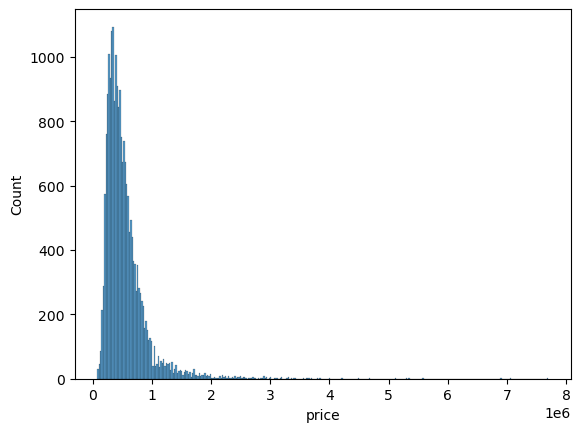

In [17]:
sns.histplot(data["price"])

<Axes: xlabel='price', ylabel='Count'>

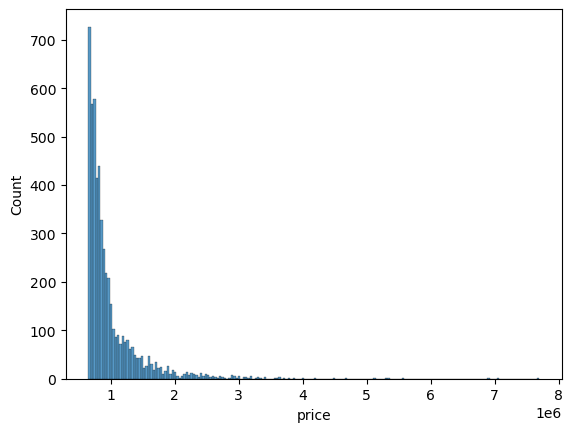

In [18]:
sns.histplot(high_value["price"])

<Axes: xlabel='price'>

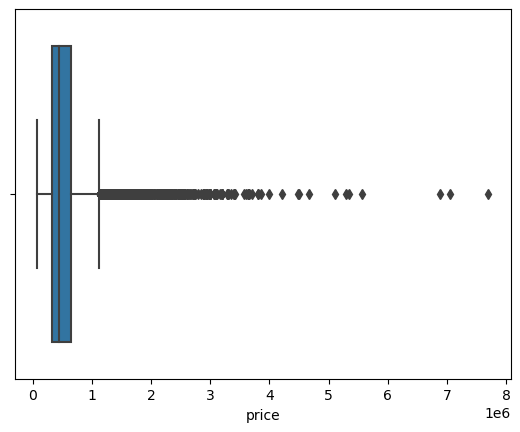

In [19]:
sns.boxplot(data=data, x="price")

<Axes: xlabel='price'>

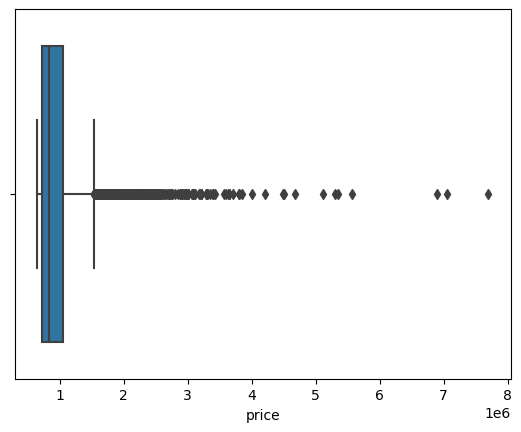

In [20]:
sns.boxplot(data=high_value, x="price")

- Complete dataset: the price distribution is right-skewed. The mean is 540,296 while the median is 450,000, and there is a great number of outliers above 1 million. 
- High value: the distribution is exponential.

### Numerical discrete columns
Even when the dataset is mainly numerical, there are some features that are numerical discrete and therefore should be treated as categorical (number of bedrooms, bathrooms and floors, if the property has a waterfront or a view, condition and grade).

In [21]:
categorical = data[["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade"]]
categorical.head()

bedrooms  bathrooms  floors  waterfront  view  condition  grade
0         3       1.00     1.0           0     0          3      7
1         3       2.25     2.0           0     0          3      7
2         2       1.00     1.0           0     0          3      6
3         4       3.00     1.0           0     0          5      7
4         3       2.00     1.0           0     0          3      8

All properties: bedrooms

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


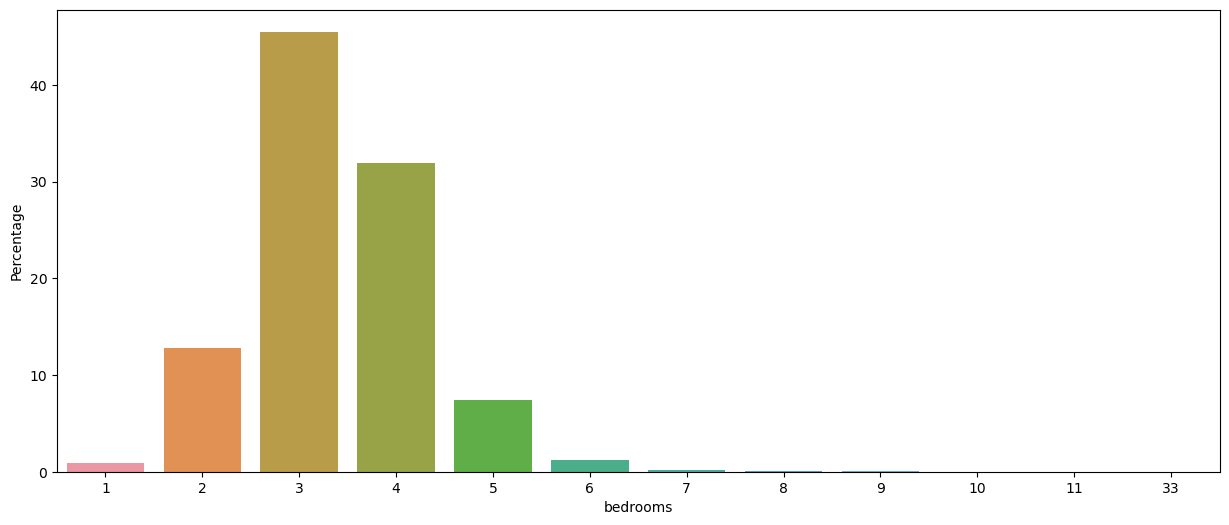

High value properties: bedrooms

count    5322.000000
mean        3.825442
std         0.894011
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        10.000000
Name: bedrooms, dtype: float64


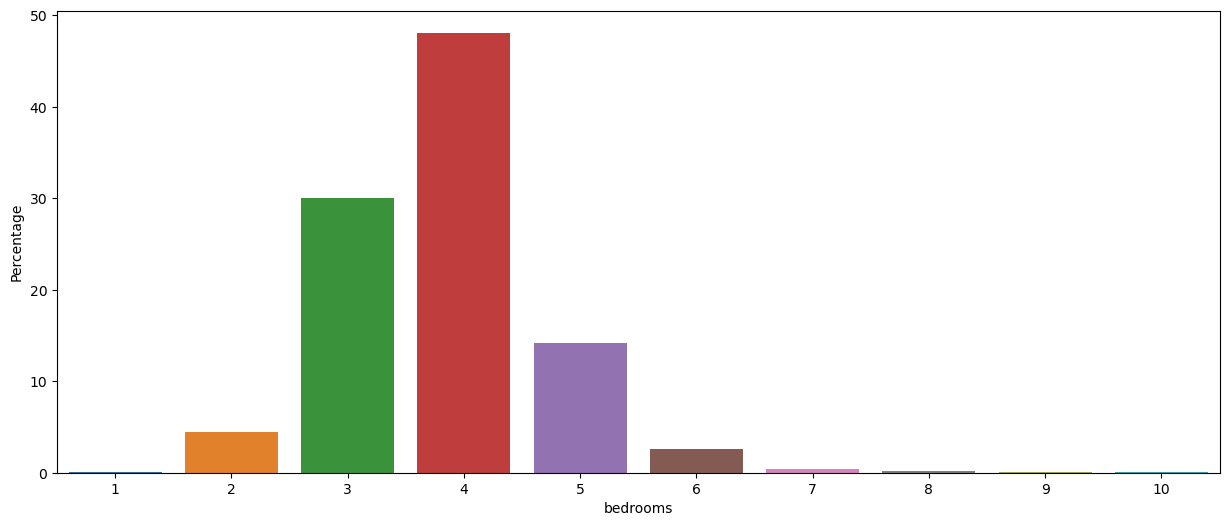

All properties: bathrooms

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


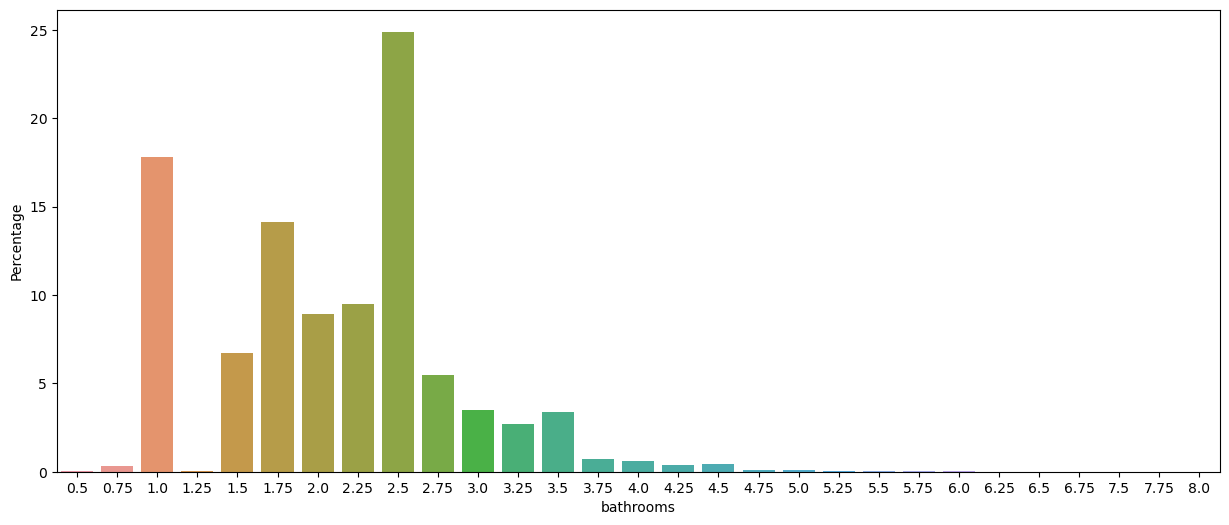

High value properties: bathrooms

count    5322.000000
mean        2.677612
std         0.791125
min         0.750000
25%         2.250000
50%         2.500000
75%         3.250000
max         8.000000
Name: bathrooms, dtype: float64


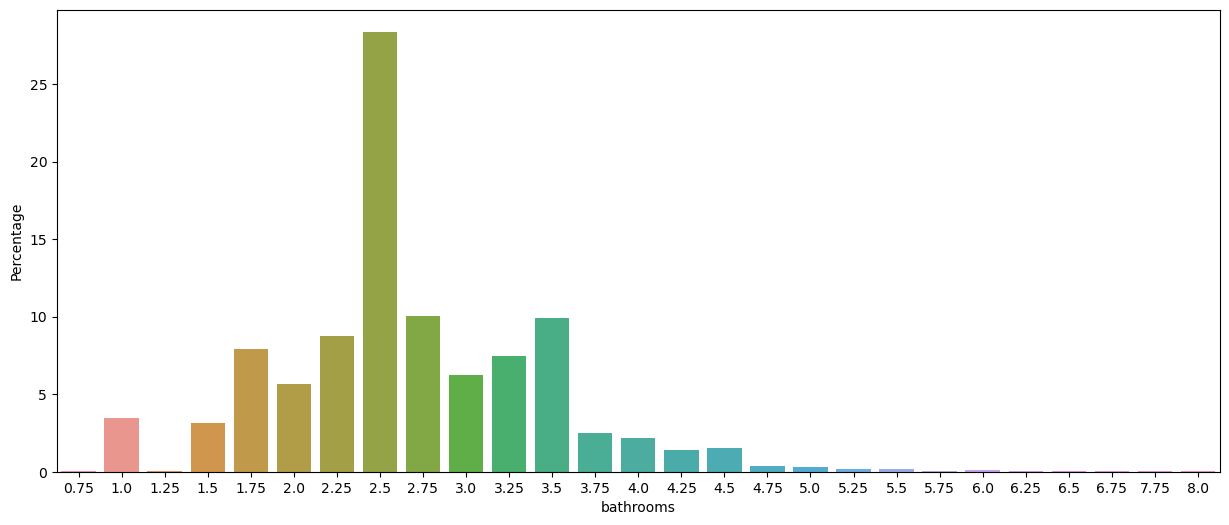

All properties: floors

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


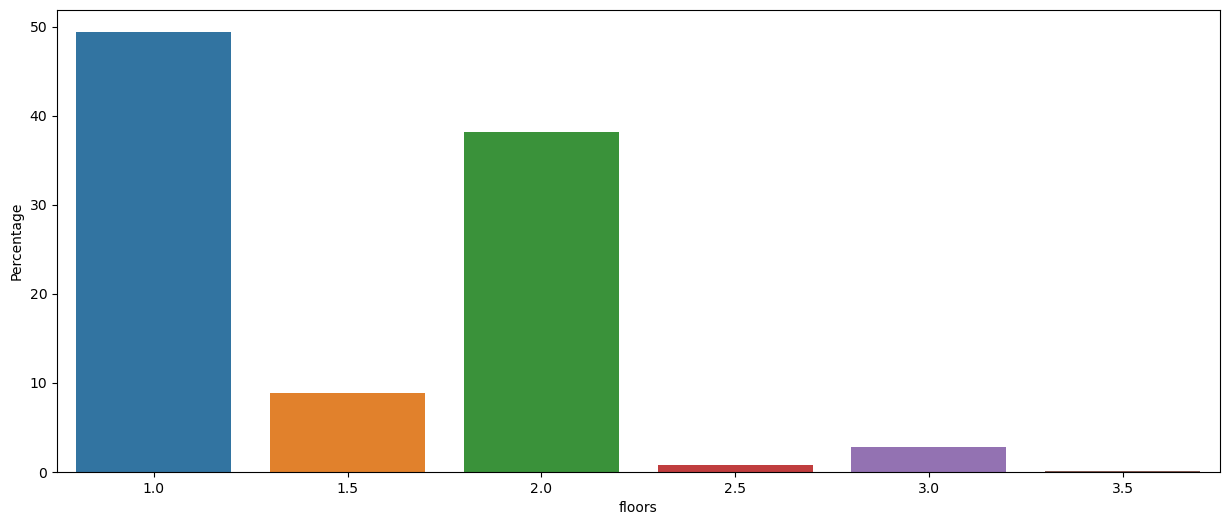

High value properties: floors

count    5322.000000
mean        1.712796
std         0.495660
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.500000
Name: floors, dtype: float64


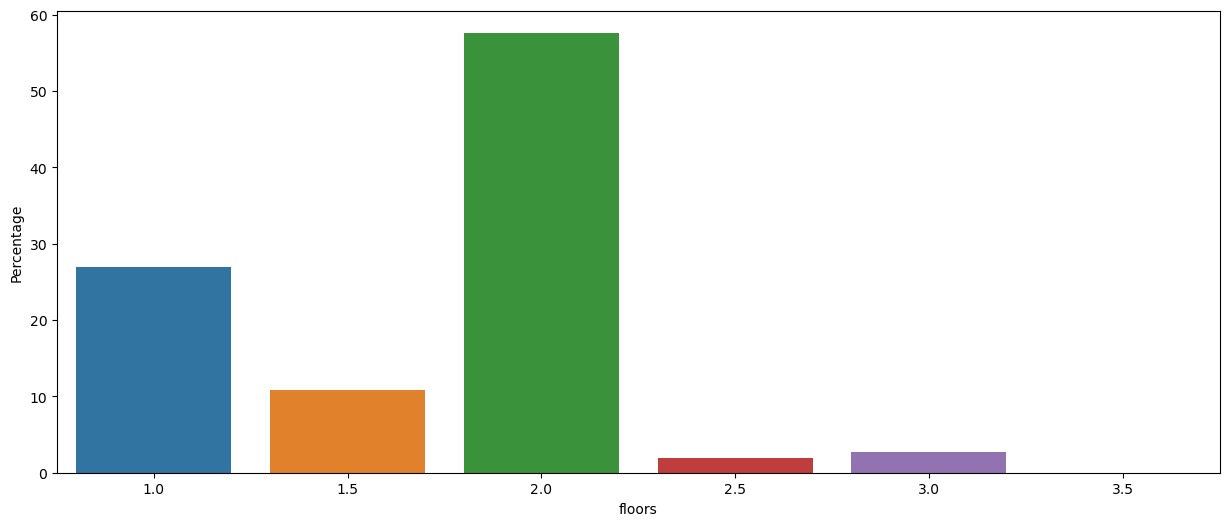

All properties: waterfront

count    21597.000000
mean         0.007547
std          0.086549
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64


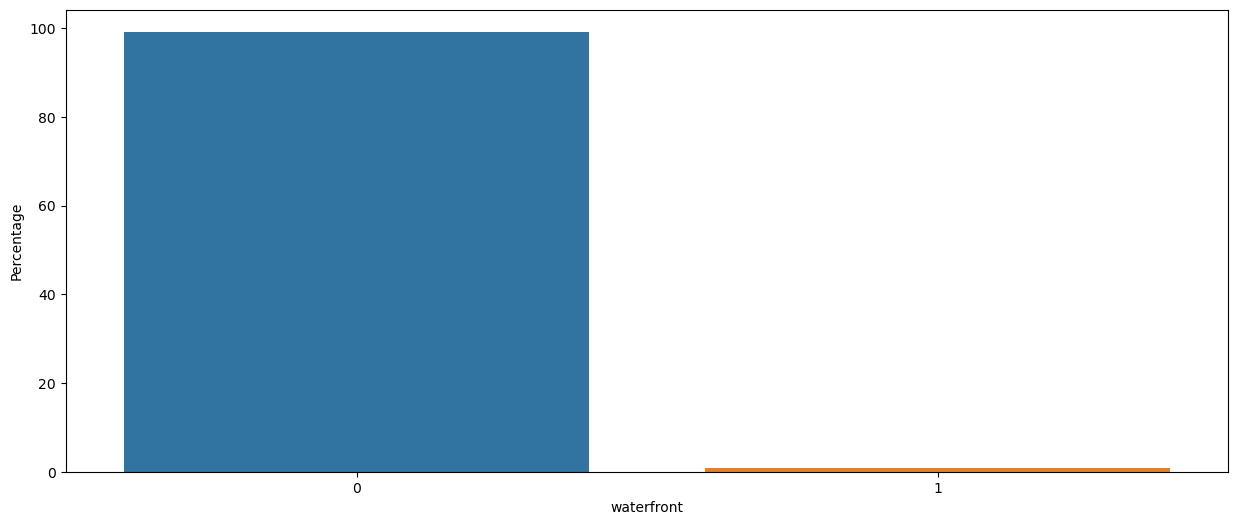

High value properties: waterfront

count    5322.000000
mean        0.025179
std         0.156682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: waterfront, dtype: float64


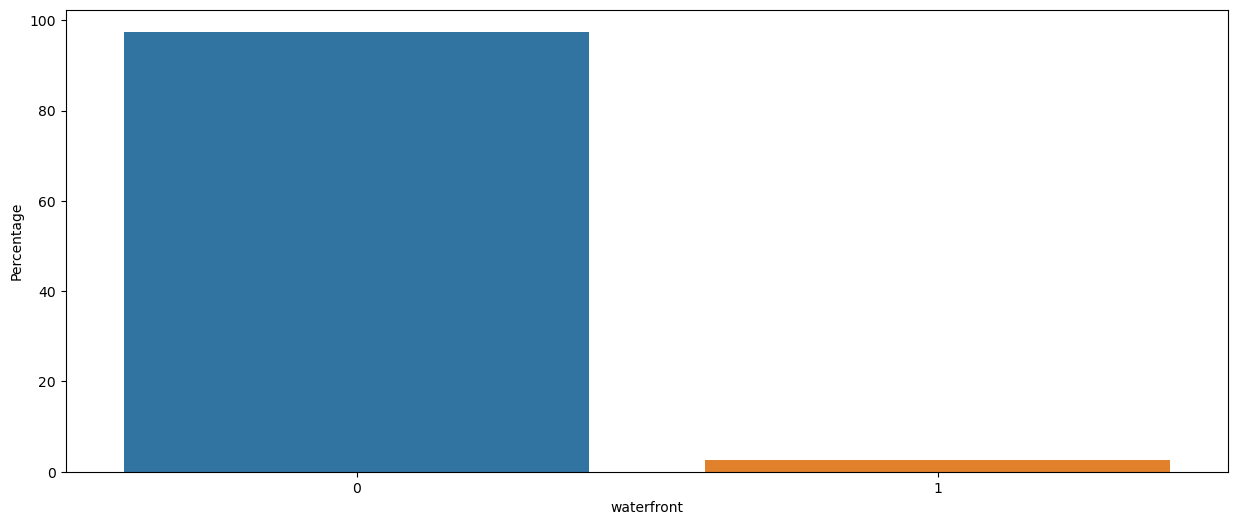

All properties: view

count    21597.000000
mean         0.234292
std          0.766390
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64


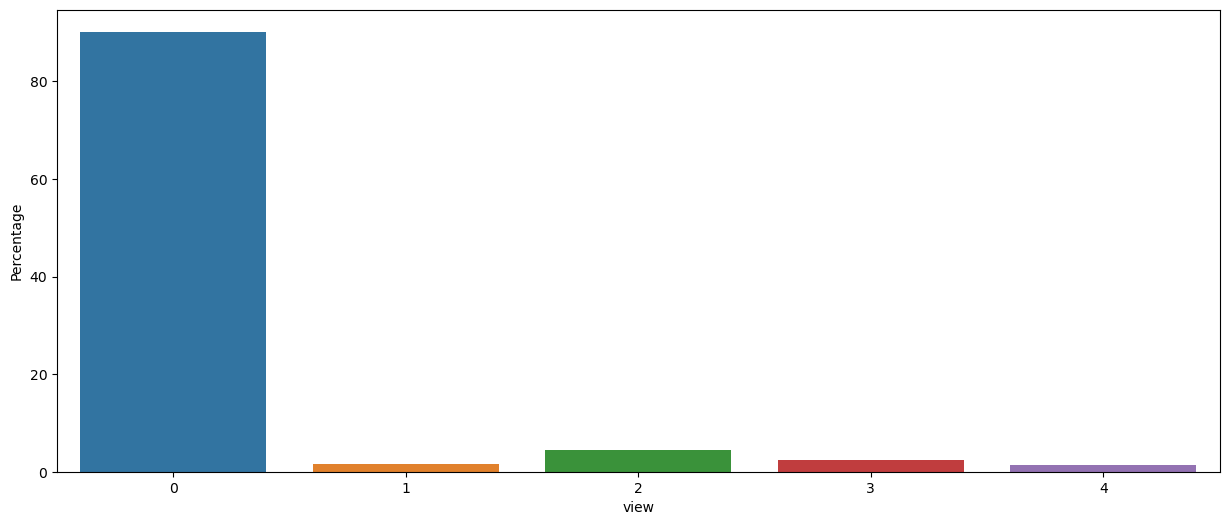

High value properties: view

count    5322.000000
mean        0.627772
std         1.198384
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: view, dtype: float64


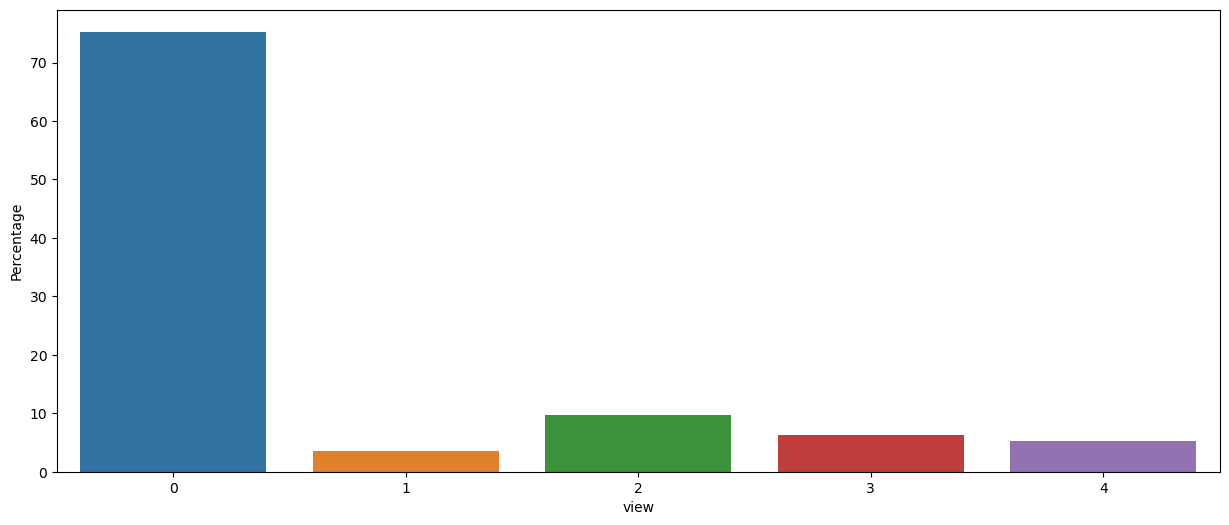

All properties: condition

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64


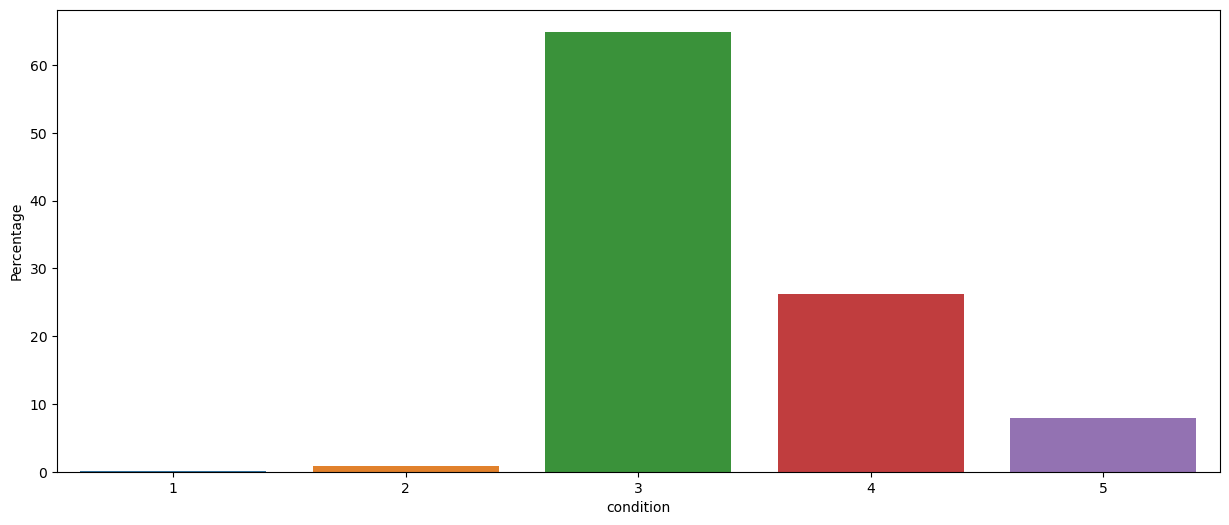

High value properties: condition

count    5322.000000
mean        3.462608
std         0.687508
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: condition, dtype: float64


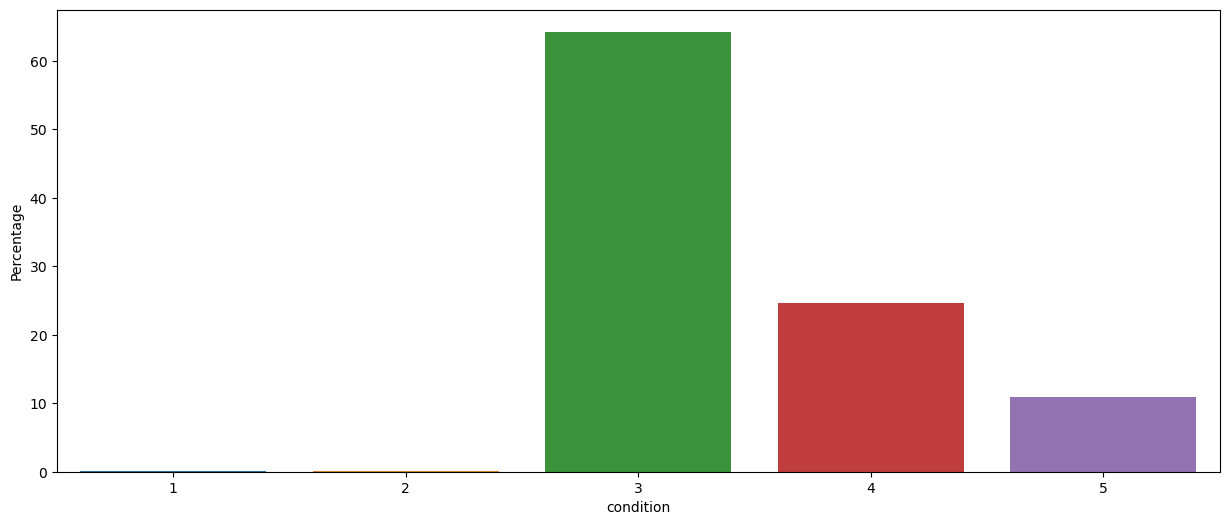

All properties: grade

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64


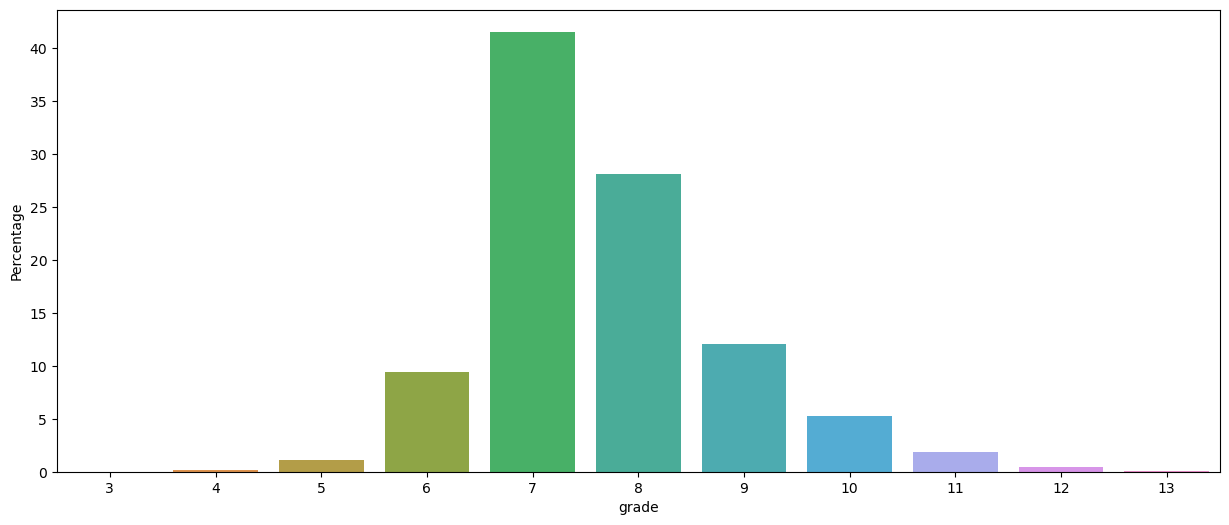

High value properties: grade

count    5322.000000
mean        8.848177
std         1.226572
min         5.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        13.000000
Name: grade, dtype: float64


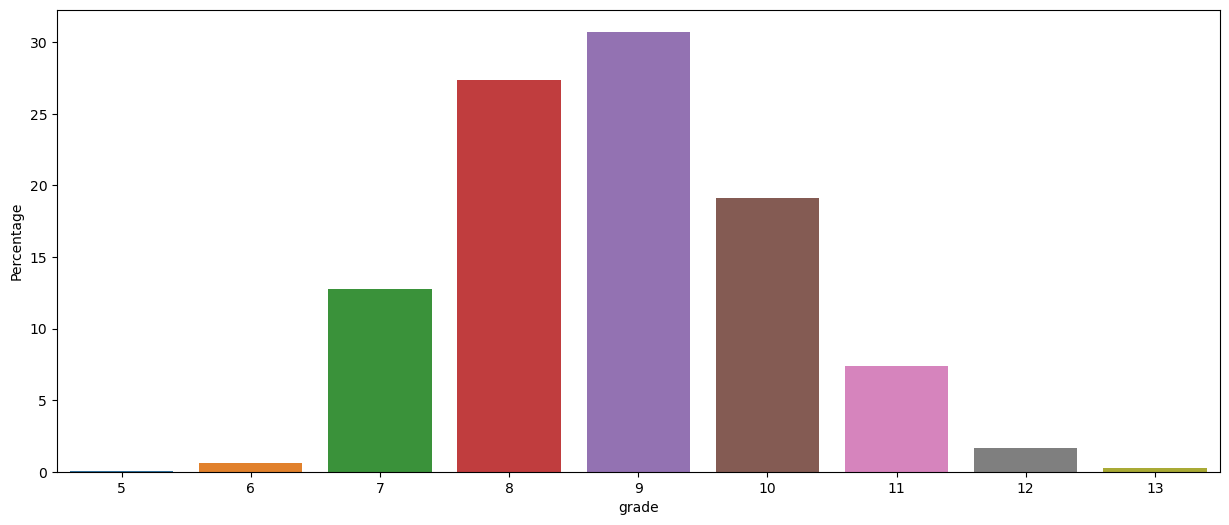

In [22]:
for col in categorical.columns:
    print(f"All properties: {col}")
    print("")
    print(data[col].describe())
    
    plt.figure(figsize=(15, 6))
    total_counts = data[col].value_counts()
    total_percentage = total_counts / total_counts.sum() * 100
    ax = sns.barplot(x=total_percentage.index, y=total_percentage.values)
    ax.set(xlabel=f"{col}", ylabel="Percentage")
    plt.show()
    
    print(f"High value properties: {col}")
    print("")
    print(high_value[col].describe())
    
    plt.figure(figsize=(15, 6))
    high_value_counts = high_value[col].value_counts()
    high_value_percentage = high_value_counts / high_value_counts.sum() * 100
    ax = sns.barplot(x=high_value_percentage.index, y=high_value_percentage.values)
    ax.set(xlabel=f"{col}", ylabel="Percentage")
    plt.show()

For understanding the **condition** and **grade** columns, we will use the following resource: <br>

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r <br>

**Condition**:
Relative to age and grade. Coded 1-5.

- **1 = Poor- Worn out**. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

- **2 = Fair- Badly worn**. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

- **3 = Average**- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

- **4 = Good**- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

- **5= Very Good**- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. <br>

**Grade**:
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

- **1-3** Falls short of minimum building standards. Normally cabin or inferior structure.

- **4** Generally older, low quality construction. Does not meet code.

- **5** Low construction costs and workmanship. Small, simple design.

- **6** Lowest grade currently meeting building code. Low quality materials and simple designs.

- **7** Average grade of construction and design. Commonly seen in plats and older sub-divisions.

- **8** Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

- **9** Better architectural design with extra interior and exterior design and quality.

- **10** Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

- **11** Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

- **12** Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

- **13** Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.


### Area columns
These features are continuous and are in square feet. To enable a better understandment of the data, we will convert it to square meters.

In [23]:
cols = data.columns.tolist()
sqft_columns = [col for col in cols if col.startswith("sqft")]
sqft_columns

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [24]:
def sqft_to_m2(x):
    return round(x/10.772)

In [25]:
area_df = data[sqft_columns]
area_df_hv = high_value[sqft_columns]
for col in sqft_columns:
    area_df[f"{col}_m"] = data[col].apply(sqft_to_m2)
    area_df_hv[f"{col}_m"] = area_df_hv[col].apply(sqft_to_m2)

In [26]:
area_df.head()

sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
0         1180      5650        1180              0           1340   
1         2570      7242        2170            400           1690   
2          770     10000         770              0           2720   
3         1960      5000        1050            910           1360   
4         1680      8080        1680              0           1800   

   sqft_lot15  sqft_living_m  sqft_lot_m  sqft_above_m  sqft_basement_m  \
0        5650            110         525           110                0   
1        7639            239         672           201               37   
2        8062             71         928            71                0   
3        5000            182         464            97               84   
4        7503            156         750           156                0   

   sqft_living15_m  sqft_lot15_m  
0              124           525  
1              157           709  
2              253           748  
3              126           464  
4              167           697

In [27]:
cols = area_df.columns.tolist()
m2_columns = [col for col in cols if col.endswith("_m")]
m2_columns

['sqft_living_m',
 'sqft_lot_m',
 'sqft_above_m',
 'sqft_basement_m',
 'sqft_living15_m',
 'sqft_lot15_m']

All properties: sqft_living_m

count    21597.000000
mean       193.127796
std         85.229669
min         34.000000
25%        133.000000
50%        177.000000
75%        237.000000
max       1257.000000
Name: sqft_living_m, dtype: float64


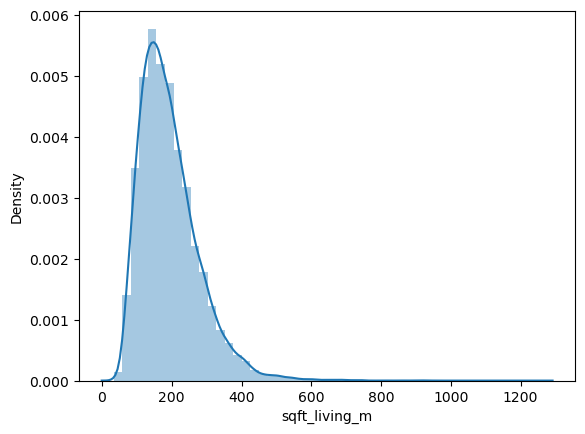

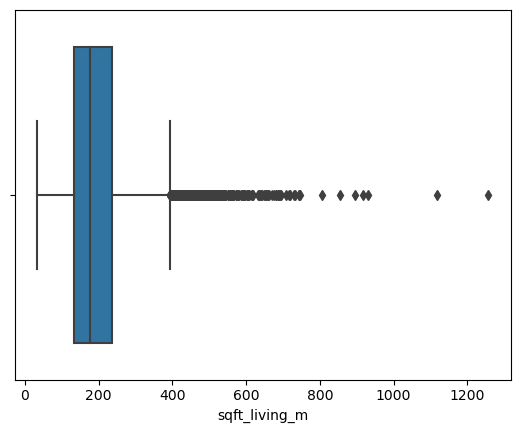

High value properties: sqft_living_m

count    5322.000000
mean      278.945885
std        95.478727
min        83.000000
25%       216.000000
50%       268.000000
75%       326.000000
max      1257.000000
Name: sqft_living_m, dtype: float64


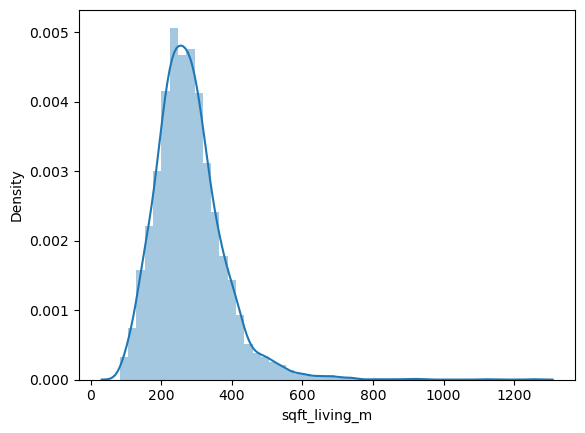

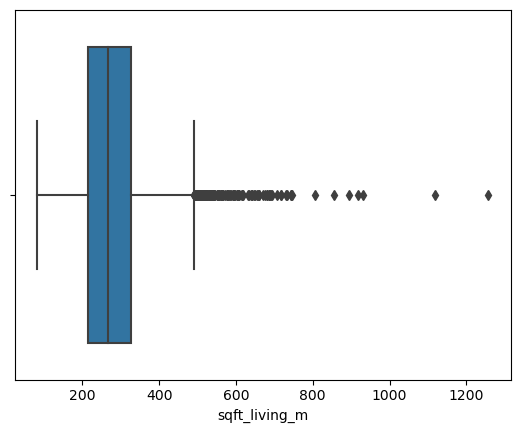

All properties: sqft_lot_m

count     21597.000000
mean       1401.715146
std        3844.472947
min          48.000000
25%         468.000000
50%         707.000000
75%         992.000000
max      153301.000000
Name: sqft_lot_m, dtype: float64


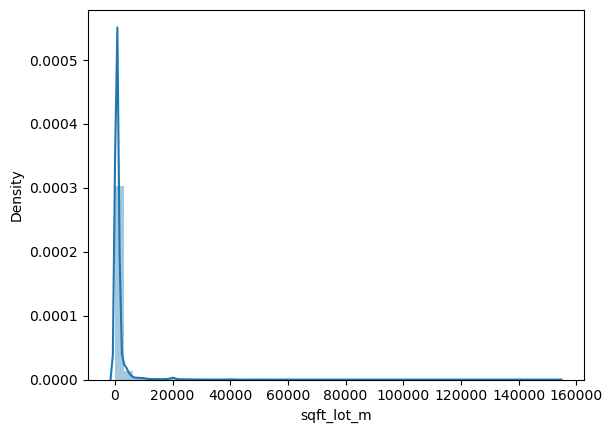

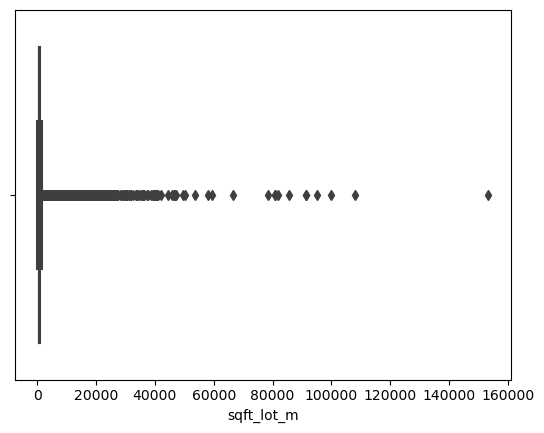

High value properties: sqft_lot_m

count      5322.000000
mean       1975.084743
std        5592.337755
min          48.000000
25%         501.000000
50%         797.000000
75%        1337.000000
max      153301.000000
Name: sqft_lot_m, dtype: float64


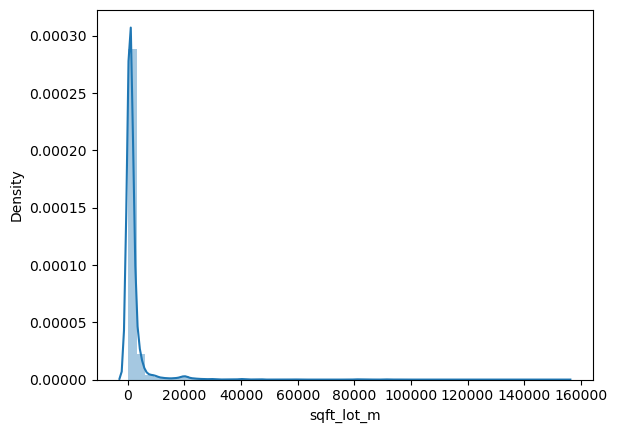

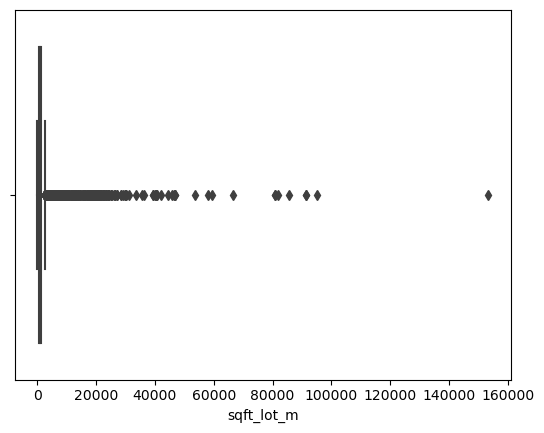

All properties: sqft_above_m

count    21597.000000
mean       166.042460
std         76.845206
min         34.000000
25%        110.000000
50%        145.000000
75%        205.000000
max        874.000000
Name: sqft_above_m, dtype: float64


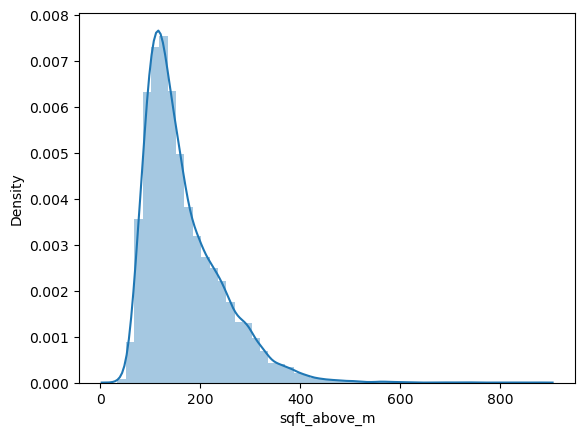

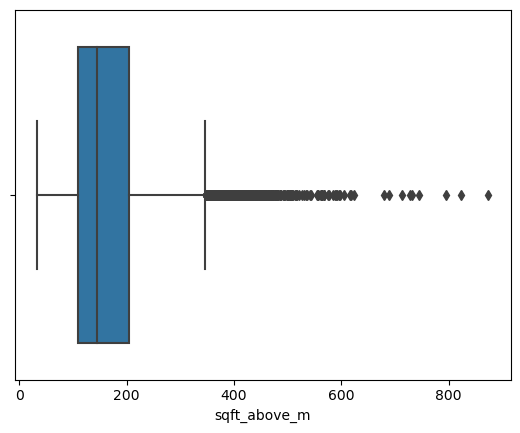

High value properties: sqft_above_m

count    5322.000000
mean      235.698610
std        91.436664
min        54.000000
25%       163.000000
50%       227.000000
75%       293.000000
max       874.000000
Name: sqft_above_m, dtype: float64


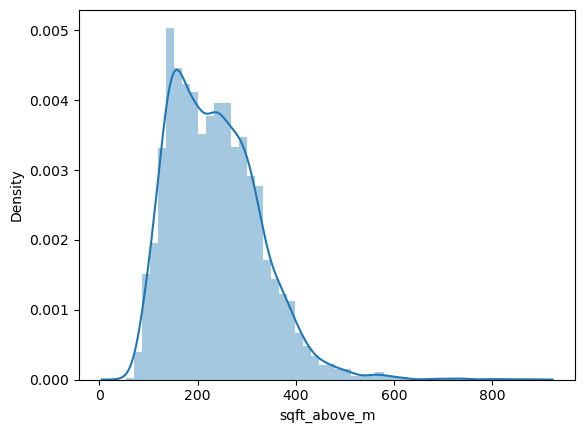

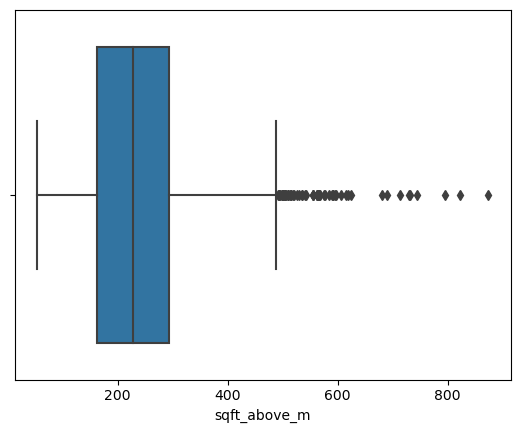

All properties: sqft_basement_m

count    21597.000000
mean        27.078622
std         41.093660
min          0.000000
25%          0.000000
50%          0.000000
75%         52.000000
max        447.000000
Name: sqft_basement_m, dtype: float64


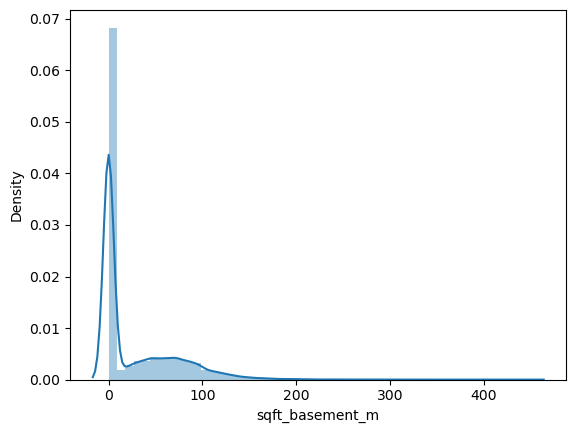

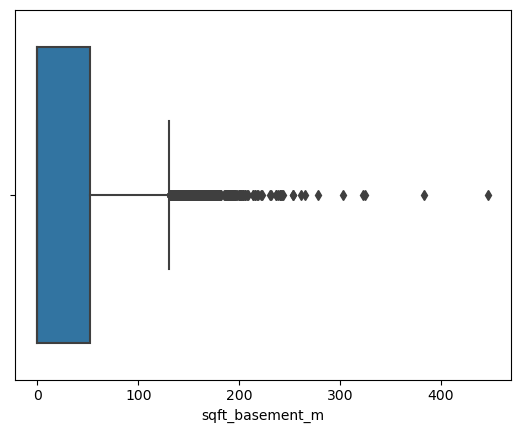

High value properties: sqft_basement_m

count    5322.000000
mean       43.248215
std        53.223745
min         0.000000
25%         0.000000
50%         0.000000
75%        83.000000
max       447.000000
Name: sqft_basement_m, dtype: float64


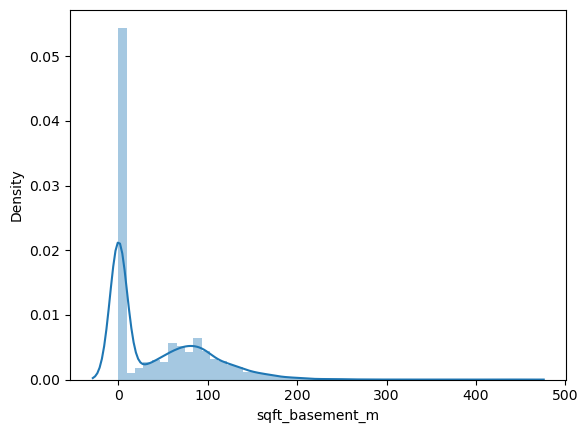

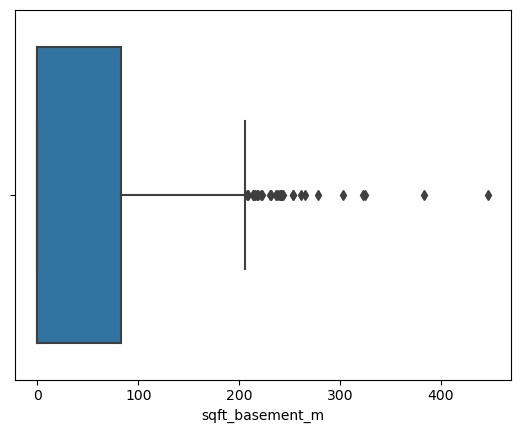

All properties: sqft_living15_m

count    21597.000000
mean       184.430013
std         63.612269
min         37.000000
25%        138.000000
50%        171.000000
75%        219.000000
max        576.000000
Name: sqft_living15_m, dtype: float64


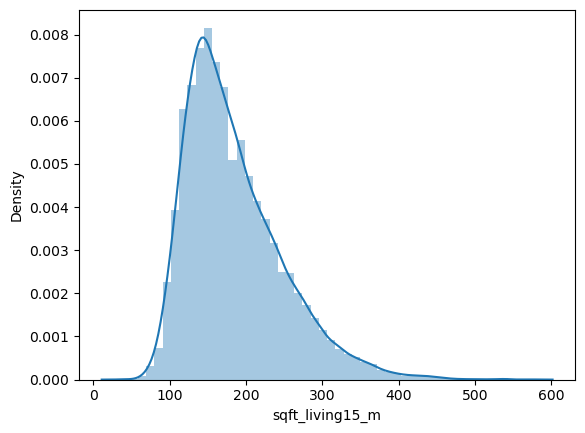

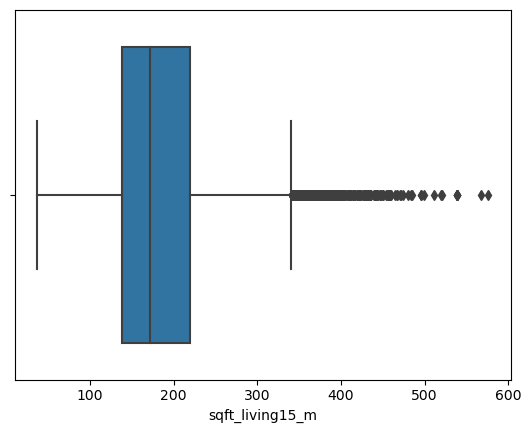

High value properties: sqft_living15_m

count    5322.000000
mean      243.433108
std        72.725059
min        80.000000
25%       188.000000
50%       240.000000
75%       291.000000
max       576.000000
Name: sqft_living15_m, dtype: float64


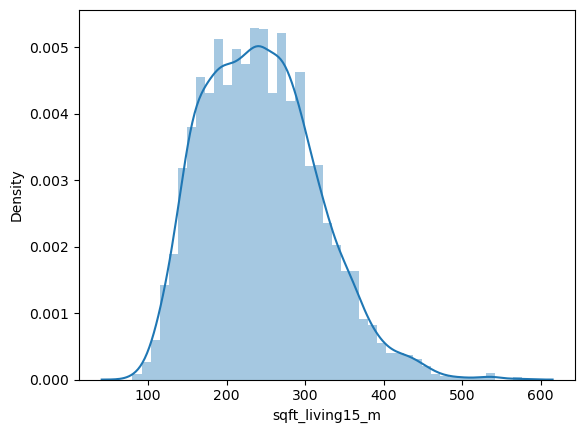

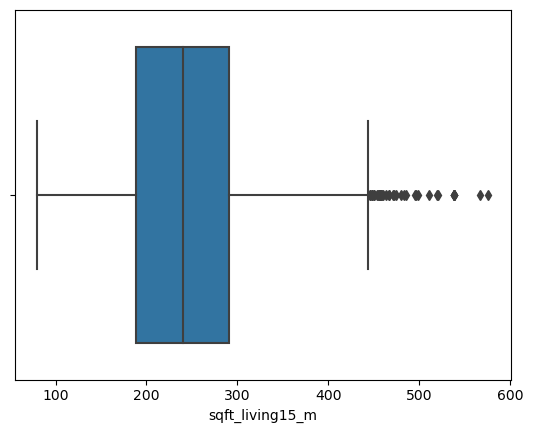

All properties: sqft_lot15_m

count    21597.000000
mean      1184.377552
std       2531.978001
min         60.000000
25%        473.000000
50%        707.000000
75%        936.000000
max      80876.000000
Name: sqft_lot15_m, dtype: float64


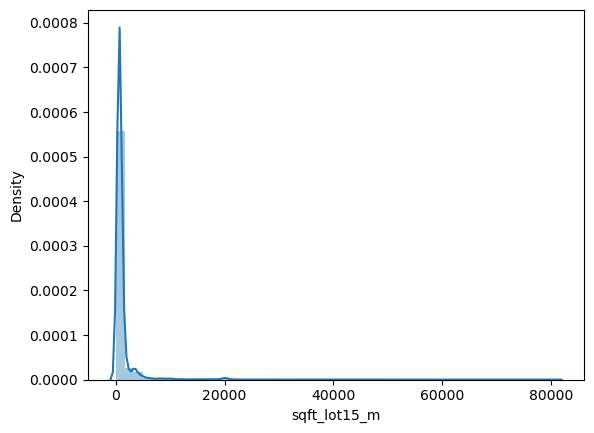

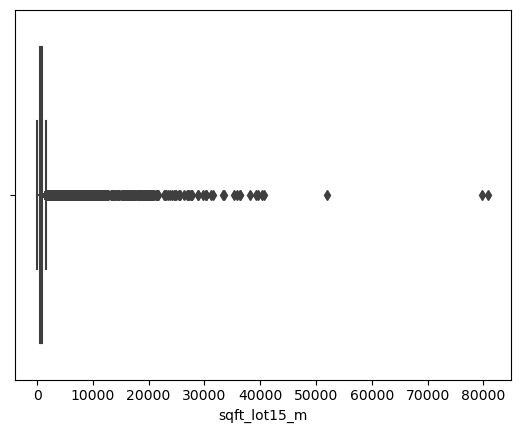

High value properties: sqft_lot15_m

count     5322.000000
mean      1508.047726
std       3264.010532
min         90.000000
25%        487.000000
50%        780.500000
75%       1201.000000
max      80876.000000
Name: sqft_lot15_m, dtype: float64


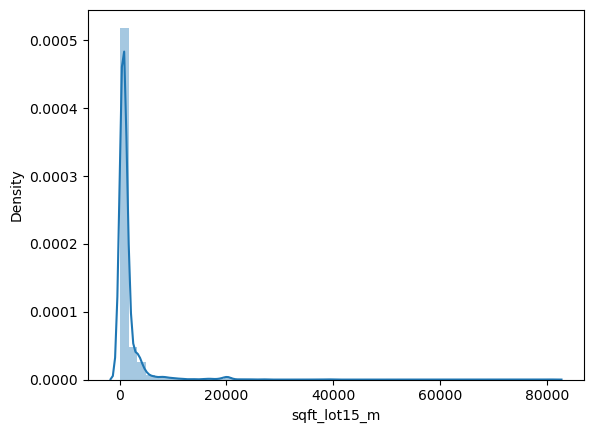

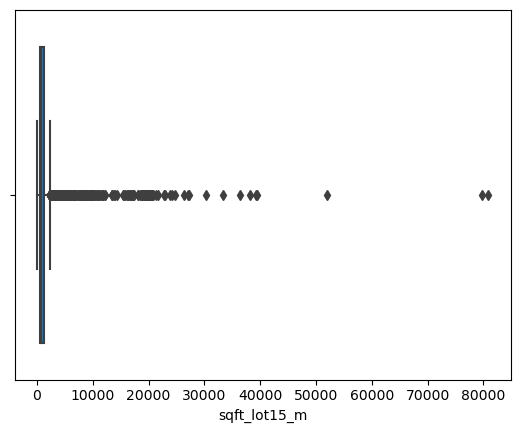

In [28]:
for col in m2_columns:
    print(f"All properties: {col}")
    print("")
    print(area_df[col].describe())
    
    sns.distplot(area_df[col])
    plt.show()
    
    sns.boxplot(data=area_df, x=col)
    plt.show()
    
    print(f"High value properties: {col}")
    print("")
    print(area_df_hv[col].describe())
    
    sns.distplot(area_df_hv[col])
    plt.show()
    
    sns.boxplot(data=area_df_hv, x=col)
    plt.show()

The distribution here is also right skewed.
- Living area: the median is 177 m<sup>2</sup>, with a maximum of 1258 m<sup>2</sup>
- Regarding the lot, all the properties have at least some area (there are no zeros, with a minimum size of 48 m<sup>2</sup>. The range of this feature is extremely big, with outliers that have several hectares and go up to a maximum of 15 ha. 
- Basement: here we do found a great proportion of houses that have no basement (the median being zero). <br>

What is the relationship between these features?

In [29]:
area_df

sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
0             1180      5650        1180              0           1340   
1             2570      7242        2170            400           1690   
2              770     10000         770              0           2720   
3             1960      5000        1050            910           1360   
4             1680      8080        1680              0           1800   
...            ...       ...         ...            ...            ...   
21592         1530      1131        1530              0           1530   
21593         2310      5813        2310              0           1830   
21594         1020      1350        1020              0           1020   
21595         1600      2388        1600              0           1410   
21596         1020      1076        1020              0           1020   

       sqft_lot15  sqft_living_m  sqft_lot_m  sqft_above_m  sqft_basement_m  \
0            5650            110         525           110                0   
1            7639            239         672           201               37   
2            8062             71         928            71                0   
3            5000            182         464            97               84   
4            7503            156         750           156                0   
...           ...            ...         ...           ...              ...   
21592        1509            142         105           142                0   
21593        7200            214         540           214                0   
21594        2007             95         125            95                0   
21595        1287            149         222           149                0   
21596        1357             95         100            95                0   

       sqft_living15_m  sqft_lot15_m  
0                  124           525  
1                  157           709  
2                  253           748  
3                  126           464  
4                  167           697  
...                ...           ...  
21592              142           140  
21593              170           668  
21594               95           186  
21595              131           119  
21596               95           126  

[21597 rows x 12 columns]

- "sqft_living" is the sum of "sqft_above" and "sqft_basement".
- Therefore, consider to drop the last two.
- Regarding "sqft_living15" and "sqft_lot15", looks like many properties have had some kind of change in space. Let's do some exploration here.

In [30]:
drop_cols = drop_cols + ["sqft_above", "sqft_basement"]

In [31]:
area_df["sqft_living_diff_m"] = sqft_to_m2(area_df["sqft_living15"] - area_df["sqft_living"])
area_df["sqft_lot_diff_m"] = sqft_to_m2(area_df["sqft_lot15"] - area_df["sqft_lot"])
area_df.head()

sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
0         1180      5650        1180              0           1340   
1         2570      7242        2170            400           1690   
2          770     10000         770              0           2720   
3         1960      5000        1050            910           1360   
4         1680      8080        1680              0           1800   

   sqft_lot15  sqft_living_m  sqft_lot_m  sqft_above_m  sqft_basement_m  \
0        5650            110         525           110                0   
1        7639            239         672           201               37   
2        8062             71         928            71                0   
3        5000            182         464            97               84   
4        7503            156         750           156                0   

   sqft_living15_m  sqft_lot15_m  sqft_living_diff_m  sqft_lot_diff_m  
0              124           525                15.0              0.0  
1              157           709               -82.0             37.0  
2              253           748               181.0           -180.0  
3              126           464               -56.0              0.0  
4              167           697                11.0            -54.0

In [32]:
area_df["sqft_living_diff_m"].describe()

count    21597.000000
mean        -8.700097
std         55.749012
min       -807.000000
25%        -29.000000
50%          0.000000
75%         20.000000
max        214.000000
Name: sqft_living_diff_m, dtype: float64

<Axes: xlabel='sqft_living_diff_m', ylabel='Density'>

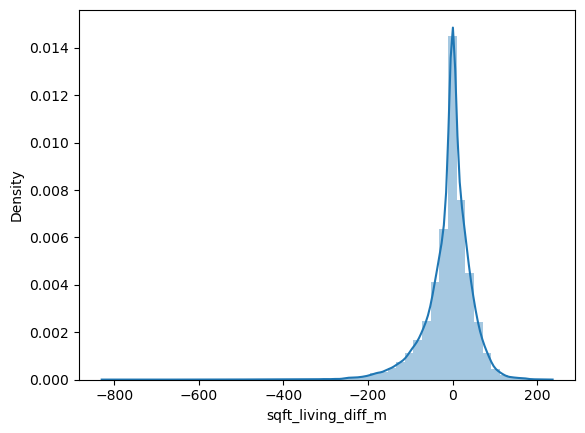

In [33]:
sns.distplot(area_df["sqft_living_diff_m"])

<Axes: xlabel='sqft_living_diff_m'>

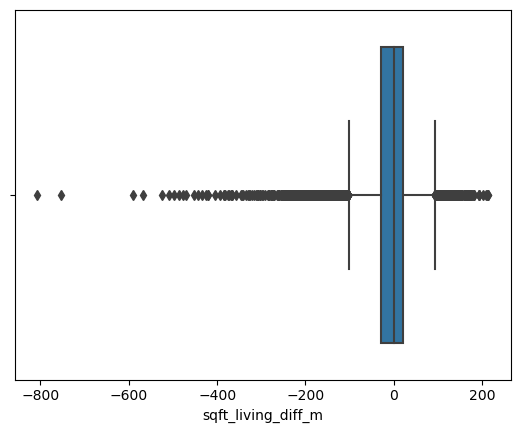

In [34]:
sns.boxplot(data=area_df, x="sqft_living_diff_m")

In [35]:
area_df["sqft_lot_diff_m"].describe()

count     21597.000000
mean       -217.338195
std        2684.905494
min     -113793.000000
25%         -63.000000
50%           0.000000
75%          39.000000
max       30345.000000
Name: sqft_lot_diff_m, dtype: float64

<Axes: xlabel='sqft_lot_diff_m', ylabel='Density'>

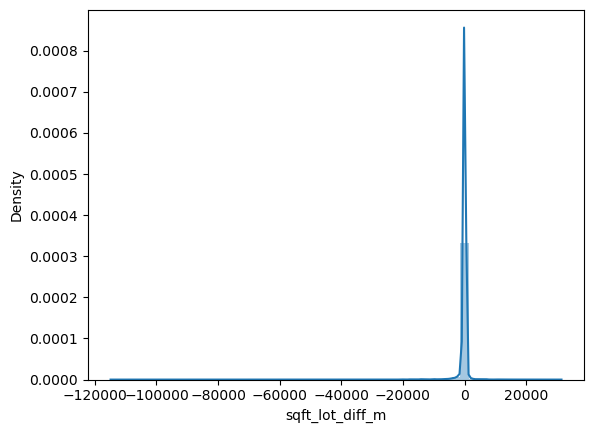

In [36]:
sns.distplot(area_df["sqft_lot_diff_m"])

<Axes: xlabel='sqft_lot_diff_m'>

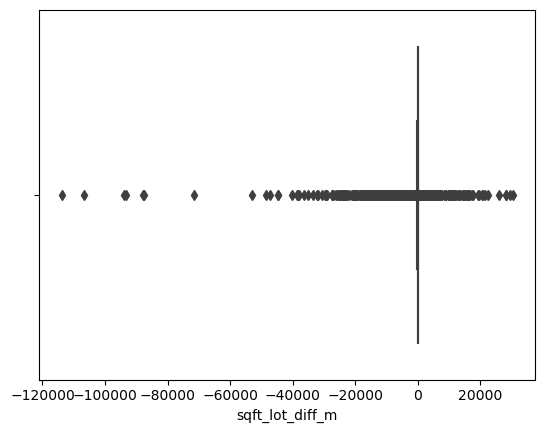

In [37]:
sns.boxplot(data=area_df, x="sqft_lot_diff_m")

In [38]:
zeros_living = (area_df["sqft_living_diff_m"] == 0).sum()
zeros_lot = (area_df["sqft_lot_diff_m"] == 0).sum()
print(f"""All properties
Count of the number of properties without changes in area:
- In the living area: {zeros_living}, {round(zeros_living/len(area_df)*100, 1)} % of the total.
- In the lot area: {zeros_lot}, {round(zeros_lot/len(area_df)*100, 1)} % of the total.""")

All properties
Count of the number of properties without changes in area:
- In the living area: 2575, 11.9 % of the total.
- In the lot area: 4766, 22.1 % of the total.


In [39]:
area_df_hv["sqft_living_diff_m"] = sqft_to_m2(area_df_hv["sqft_living15"] - area_df_hv["sqft_living"])
area_df_hv["sqft_lot_diff_m"] = sqft_to_m2(area_df_hv["sqft_lot15"] - area_df_hv["sqft_lot"])

zeros_living = (area_df_hv["sqft_living_diff_m"] == 0).sum()
zeros_lot = (area_df_hv["sqft_lot_diff_m"] == 0).sum()
print(f"""High value properties
Count of the number of properties (high value range) without changes in area:
- In the living area: {zeros_living}, {round(zeros_living/len(area_df_hv)*100, 1)} % of the total.
- In the lot area: {zeros_lot}, {round(zeros_lot/len(area_df_hv)*100, 1)} % of the total.""")

High value properties
Count of the number of properties (high value range) without changes in area:
- In the living area: 440, 8.3 % of the total.
- In the lot area: 1125, 21.1 % of the total.


Interestingly, the majority of properties have suffered some change in the area. 

### Renovations 

In [40]:
data["yr_renovated"].nunique()

70

In [41]:
data["yr_renovated"].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [42]:
zeros_count = (data["yr_renovated"] == 0).sum()
print(f"""All properties
Number of properties without renovation: {zeros_count}, {round(zeros_count/len(data)*100, 1)} % of the total.""")

zeros_count_hv = (high_value["yr_renovated"] == 0).sum()
print(f"""High value properties
Number of properties without renovation: {zeros_count_hv}, {round(zeros_count_hv/len(high_value)*100, 1)} % of the total.""")

All properties
Number of properties without renovation: 20683, 95.8 % of the total.
High value properties
Number of properties without renovation: 4899, 92.1 % of the total.


We see that most houses have not been renovated, however, the proportion of renovated houses is larger in the high value range. <br>

On the other hand, these percentages are not consistent with what we found above related with the changes in the area. It is possible that, in order to be considered a renovation, the changes made have to be larger. Or perhaps the 2015 measures correct some kind of error in the initial measures. <br>

What info can the year of renovation tell us?

In [43]:
renovated_prop = data[data["yr_renovated"] != 0]
renovated_prop_hv = high_value[high_value["yr_renovated"] != 0]

In [44]:
renovated_prop["yr_renovated"].min(), renovated_prop["yr_renovated"].max()

(1934, 2015)

In [45]:
renovated_prop_hv["yr_renovated"].min(), renovated_prop_hv["yr_renovated"].max()

(1954, 2015)

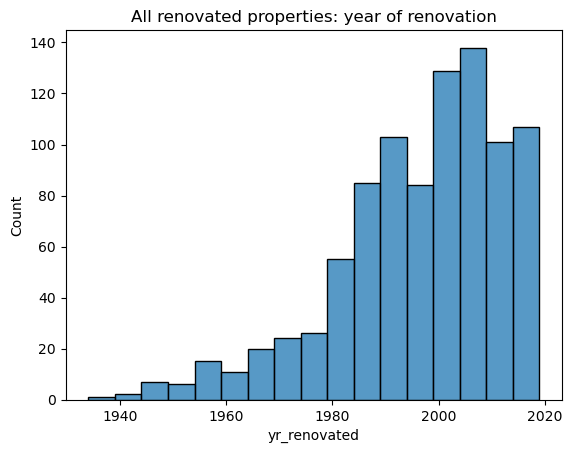

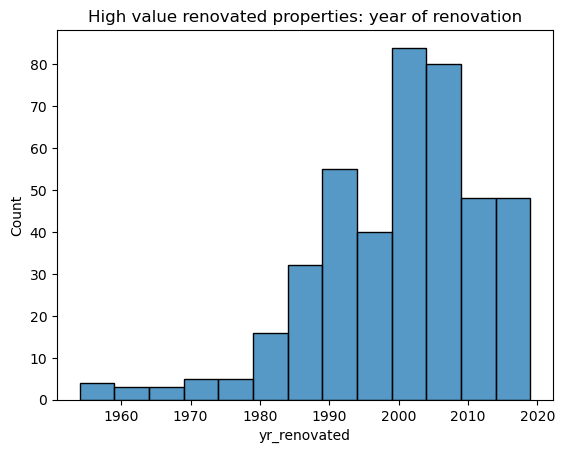

In [46]:
sns.histplot(renovated_prop["yr_renovated"], binwidth=5)
plt.title("All renovated properties: year of renovation")
plt.show()

sns.histplot(renovated_prop_hv["yr_renovated"], binwidth=5)
plt.title("High value renovated properties: year of renovation")
plt.show()

In [47]:
# Proportion of houses renovated before 1980
count = (renovated_prop["yr_renovated"] < 1980).sum()
print(f"""All properties
Number of properties renovated before 1980: {count}, {round(count/len(renovated_prop)*100, 1)} % of the total.""")

count_hv = (renovated_prop_hv["yr_renovated"] < 1980).sum()
print(f"""High value properties
Number of properties renovated before 1980: {count_hv}, {round(count_hv/len(renovated_prop_hv)*100, 1)} % of the total.""")

All properties
Number of properties renovated before 1980: 122, 13.3 % of the total.
High value properties
Number of properties renovated before 1980: 24, 5.7 % of the total.


In [48]:
# Proportion of houses renovated in the last 25 years (from 1990 onwards)
count = (renovated_prop["yr_renovated"] >= 1990).sum()
print(f"""All properties
Number of properties renovated from 1990 onwards: {count}, {round(count/len(renovated_prop)*100, 1)} % of the total.""")

count_hv = (renovated_prop_hv["yr_renovated"] >= 1990).sum()
print(f"""High value properties
Number of properties renovated from 1990 onwards: {count_hv}, {round(count_hv/len(renovated_prop_hv)*100, 1)} % of the total.""")

All properties
Number of properties renovated from 1990 onwards: 640, 70.0 % of the total.
High value properties
Number of properties renovated from 1990 onwards: 345, 81.6 % of the total.


When looking at the year of renovation in the properties that have been renovated, we see that the distribution is left-skewed, with more properties that have been renovated in the last decades. However, this tendency is more clear in the high value properties, where there is a larger proportion of renovated houses, and a larger proportion of relatively recent renovations (in the last 25 years).

In [49]:
# Create a new feature: is_renovated (yes/no)
data["is_renovated"] = data["yr_renovated"]
data["is_renovated"] = data["is_renovated"].apply(lambda x: 0 if x==0 else 1)
data["is_renovated"].value_counts()

0    20683
1      914
Name: is_renovated, dtype: int64

In [50]:
high_value["is_renovated"] = high_value["yr_renovated"]
high_value["is_renovated"] = high_value["is_renovated"].apply(lambda x: 0 if x==0 else 1)
high_value["is_renovated"].value_counts()

0    4899
1     423
Name: is_renovated, dtype: int64

### Construction year

In [51]:
data["yr_built"].nunique()

116

In [52]:
data["yr_built"].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [53]:
data["yr_built"].min(), data["yr_built"].max()

(1900, 2015)

<Axes: xlabel='yr_built', ylabel='Count'>

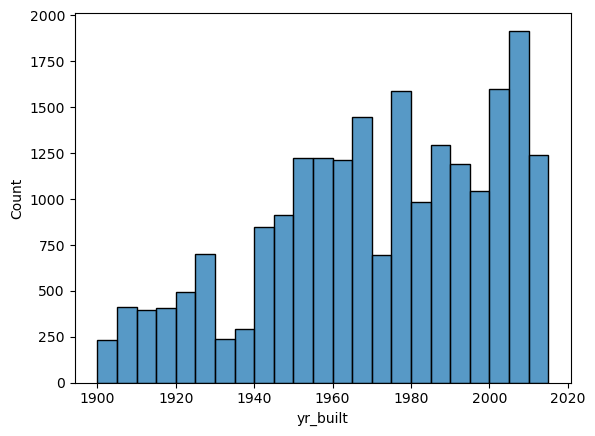

In [54]:
sns.histplot(data["yr_built"], binwidth=5)

Not surprisingly, there is a greater number of relatively recently built houses (starting from 1950-1960). The plot also shows drops in house construction in times of economic crisis (the Great Depression, the 70s oil and energy crisis, the early 90s recession, the financial crisis in 2008...)

In [55]:
high_value["yr_built"].min(), high_value["yr_built"].max()

(1900, 2015)

<Axes: xlabel='yr_built', ylabel='Count'>

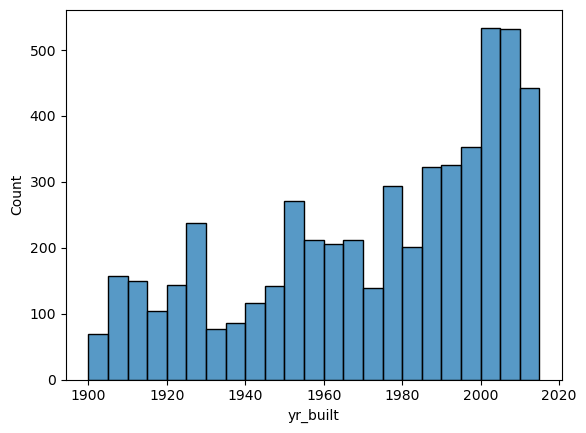

In [56]:
sns.histplot(high_value["yr_built"], binwidth=5)

Regarding the higher value properties, there is a higher proportion built in recent years. Let's make some quick calculations to confirm what we are seeing in the plots.

In [57]:
# Proportion of houses built before 1980
count = (data["yr_built"] < 1980).sum()
print(f"""All properties
Number of properties built before 1980: {count}, {round(count/len(data)*100, 1)} % of the total.""")

count_hv = (high_value["yr_built"] < 1980).sum()
print(f"""High value properties
Number of properties built before 1980: {count_hv}, {round(count_hv/len(high_value)*100, 1)} % of the total.""")

All properties
Number of properties built before 1980: 12328, 57.1 % of the total.
High value properties
Number of properties built before 1980: 2611, 49.1 % of the total.


In [58]:
# Proportion of houses built in the last 25 years (from 1990 onwards)
count = (data["yr_built"] >= 1990).sum()
print(f"""All properties
Number of properties built from 1990 onwards: {count}, {round(count/len(data)*100, 1)} % of the total.""")

count_hv = (high_value["yr_built"] >= 1990).sum()
print(f"""High value properties
Number of properties built from 1990 onwards: {count_hv}, {round(count_hv/len(high_value)*100, 1)} % of the total.""")

All properties
Number of properties built from 1990 onwards: 6988, 32.4 % of the total.
High value properties
Number of properties built from 1990 onwards: 2187, 41.1 % of the total.


### Latitude and longitude

In [59]:
data["lat"].nunique()

5033

In [60]:
data["lat"].sample(3)

12616    47.6304
6        47.3097
15900    47.5224
Name: lat, dtype: float64

In [61]:
data["long"].nunique()

751

In [62]:
data["long"].sample(3)

5737    -122.227
19721   -121.841
6885    -122.208
Name: long, dtype: float64

<Axes: xlabel='lat', ylabel='Density'>

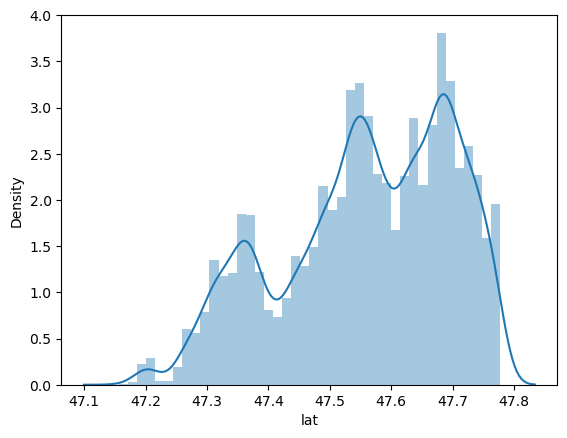

In [89]:
sns.distplot(data["lat"])

<Axes: xlabel='long', ylabel='Density'>

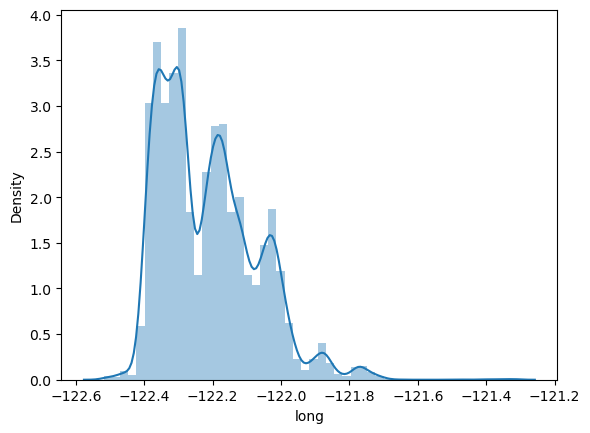

In [90]:
sns.distplot(data["long"])

#### Map with the location of all the properties

In [63]:
# Create a map centered around the average latitude and longitude
average_latitude = data['lat'].mean()
average_longitude = data['long'].mean()
m = folium.Map(location=[average_latitude, average_longitude], zoom_start=10)

# Create a marker cluster for the latitude and longitude data
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each property using latitude and longitude
for index, row in data.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Display the map
m.save('house_map.html')  # Save the map to an HTML file
m

#### Higher value properties
To compare the location of the higher value properties, we will use a heatmap.

In [64]:
# Create a map centered around the average latitude and longitude
average_latitude = data['lat'].mean()
average_longitude = data['long'].mean()
m = folium.Map(location=[average_latitude, average_longitude], zoom_start=10)

# Create a list of latitude and longitude coordinates from the high-value data
heat_data = [[row['lat'], row['long']] for index, row in data.iterrows()]

# Customize the heatmap with a different color map and opacity
heat_map = HeatMap(heat_data, gradient={0.4: 'blue', 0.9: 'green', 1: 'red'}, radius=15, blur=25, min_opacity=0.3)

# Create a HeatMap layer using the heat_data
HeatMap(heat_data).add_to(m)

# Display the map
m.save('house_density_map.html')  # Save the map to an HTML file
m

In [65]:
# Create a map centered around the average latitude and longitude
average_latitude = high_value['lat'].mean()
average_longitude = high_value['long'].mean()
m = folium.Map(location=[average_latitude, average_longitude], zoom_start=10)

# Create a list of latitude and longitude coordinates from the high-value data
heat_data = [[row['lat'], row['long']] for index, row in high_value.iterrows()]

# Customize the heatmap with a different color map and opacity
heat_map = HeatMap(heat_data, gradient={0.4: 'blue', 0.9: 'green', 1: 'red'}, radius=15, blur=25, min_opacity=0.3)

# Create a HeatMap layer using the heat_data
HeatMap(heat_data).add_to(m)

# Display the map
m.save('house_density_map_hv.html')  # Save the map to an HTML file
m

There is a higher concentration of higher value properties in the northern half of the county. Seattle (Magnolia, Queen Anne, Capitol Hill, Southwest, and all along the shore of lake Washington), Bellevue, Kirkland, Redmond

### Date

In [66]:
data["date"].describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

<Axes: xlabel='date', ylabel='Count'>

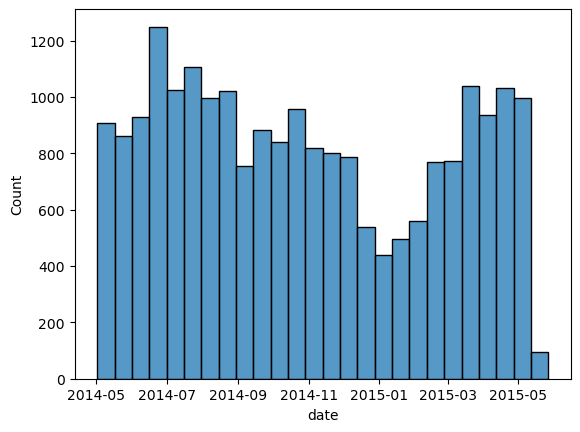

In [67]:
sns.histplot(data["date"], binwidth=15)

The dates cover only one year (May 2014 to May 2015), so we can't compare periods between years but we can look at which moments have a higher or a lower rate of sales. We will create new features to do so.

In [68]:
# New features: year, month and weekday 
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["weekday"] = data["date"].dt.weekday  # Monday is 0, Sunday is 6

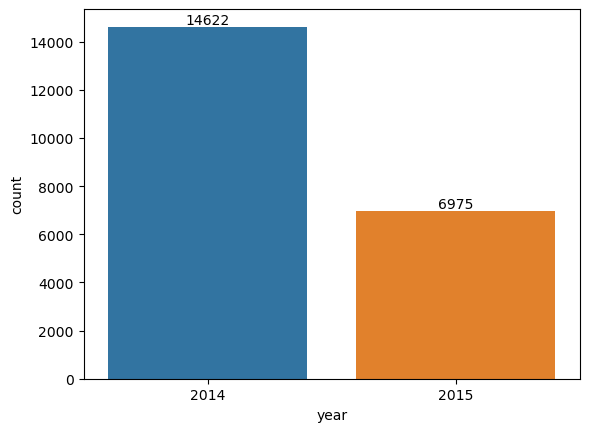

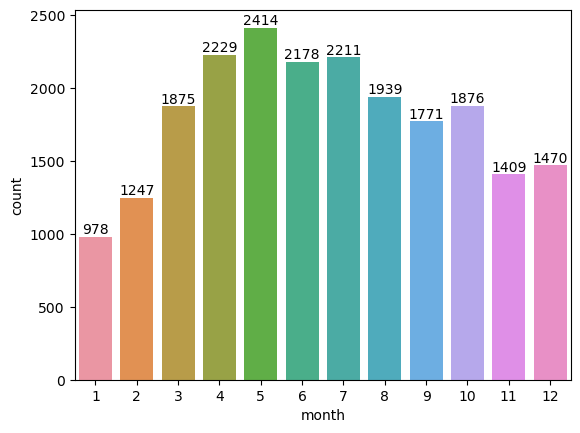

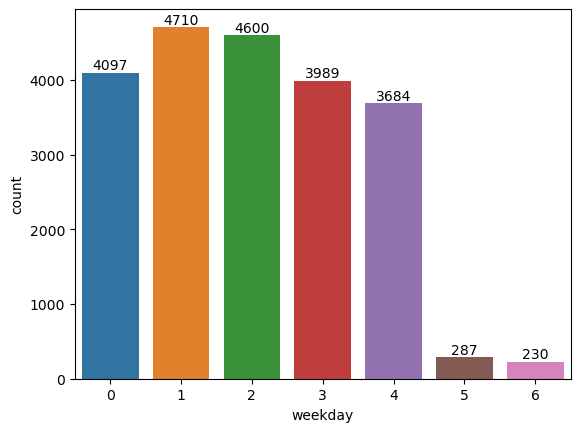

In [69]:
date_new_cols = ["year", "month", "weekday"]

for col in date_new_cols:
    ax = sns.countplot(data=data, x=col)
    ax.bar_label(ax.containers[0])
    plt.show()

- Year: more properties sold in 2014 vs 2015 (more than double).
- Month: less properties sold during the winter months (November to February), while in the months between April to July is when there are more property sales (over 2,000 houses per month).
- Weekday: Tuesday and Wednesday is when there are more sales, while during the weekend there are fewer sales.

Now that we have explored all the features to have a better understanding of the dataset, we will look into how these features are related between each other and most importantly with our target, the price.

### Multivariate analysis 
#### Continuous variables

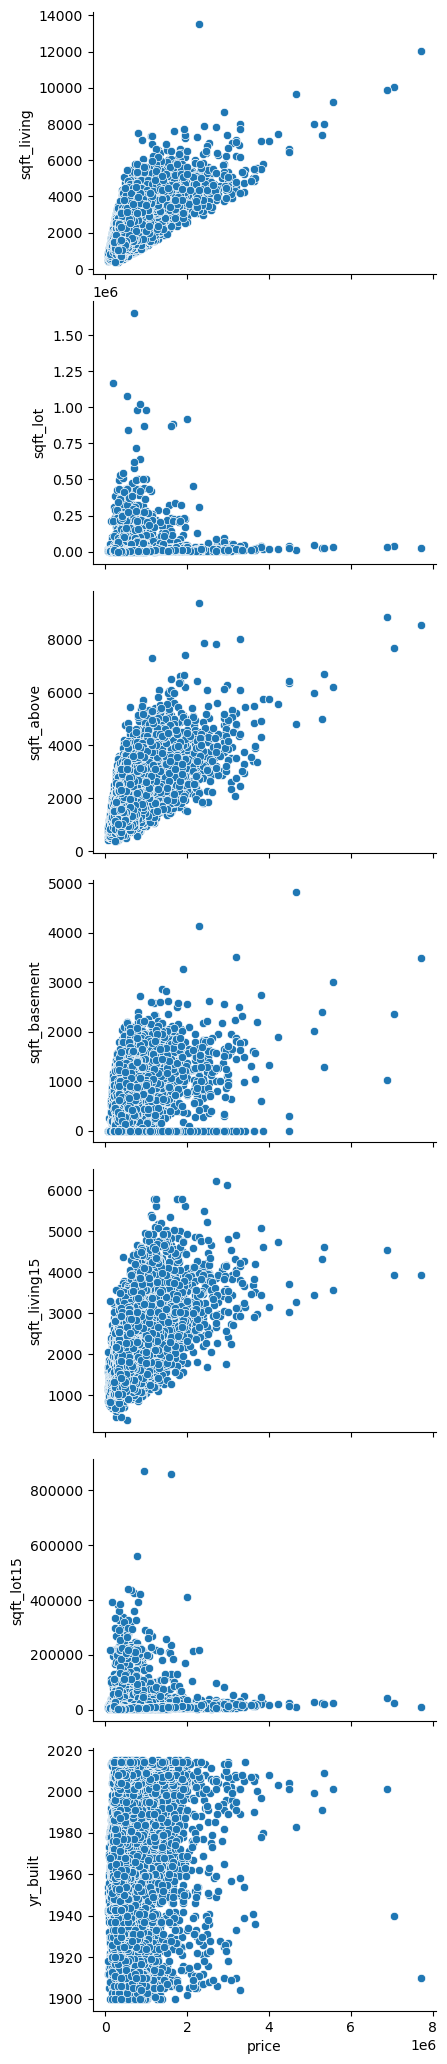

In [70]:
# Use pairplot to visualize the relationship of price with other continuous variables
continuous = data[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
                  'sqft_lot15', 'yr_built']]

sns.pairplot(data, x_vars=["price"],
             y_vars=continuous.columns,
            height=3, aspect=1.5)

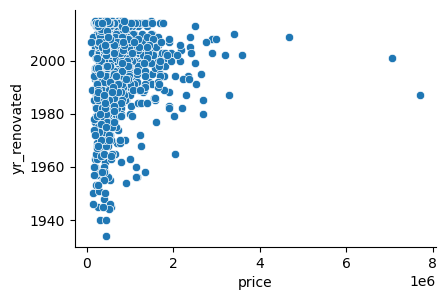

In [71]:
# For yr_renovated, take only the houses that have been renovated
sns.pairplot(renovated_prop, x_vars=["price"],
             y_vars=["yr_renovated"],
             height=3, aspect=1.5)

There is a high correlation between price and sqft_living and sqft_above. Also some correlation with sqft_living15 and sqft_basement.

#### Categorical variables

In [72]:
categorical = categorical.join(data[['is_renovated', 'year', 'month', 'weekday']])
categorical.head()                                   

bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0         3       1.00     1.0           0     0          3      7   
1         3       2.25     2.0           0     0          3      7   
2         2       1.00     1.0           0     0          3      6   
3         4       3.00     1.0           0     0          5      7   
4         3       2.00     1.0           0     0          3      8   

   is_renovated  year  month  weekday  
0             0  2014     10        0  
1             1  2014     12        1  
2             0  2015      2        2  
3             0  2014     12        1  
4             0  2015      2        2

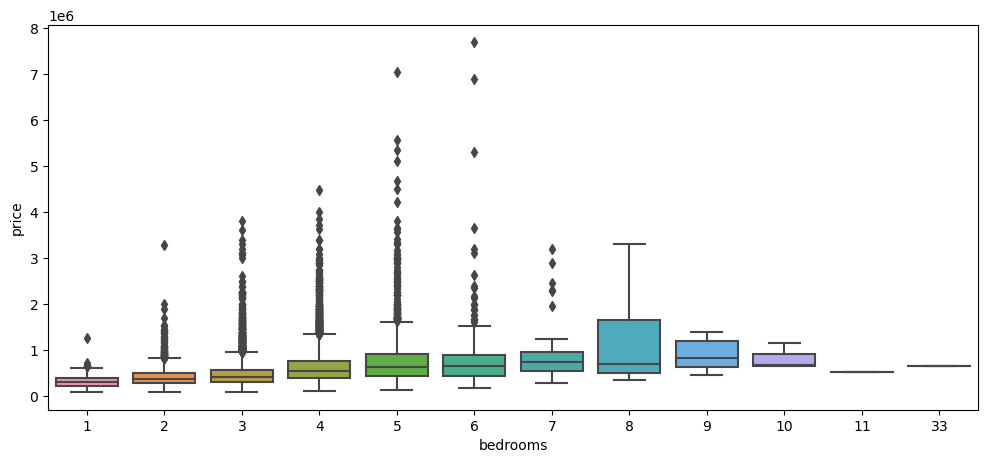

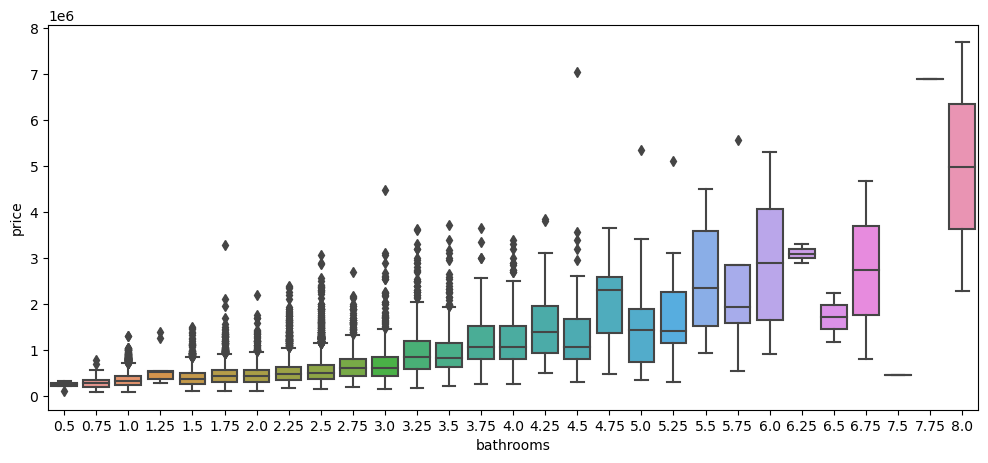

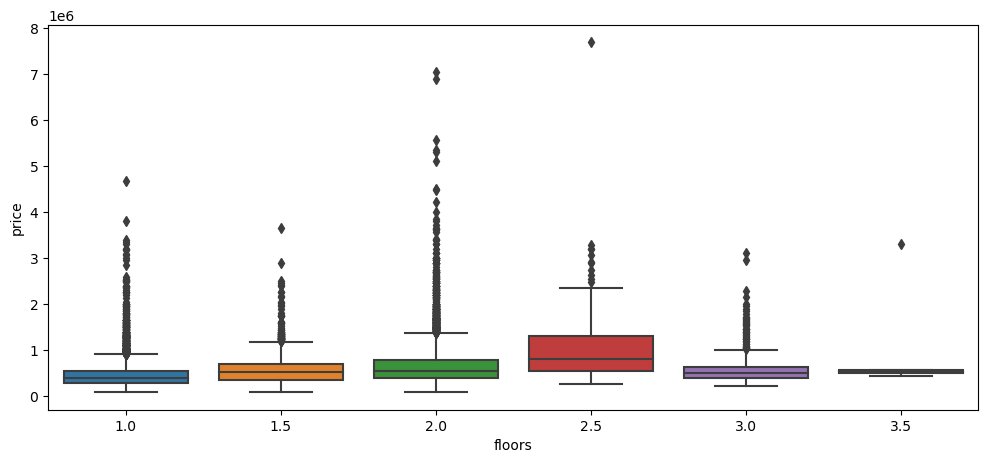

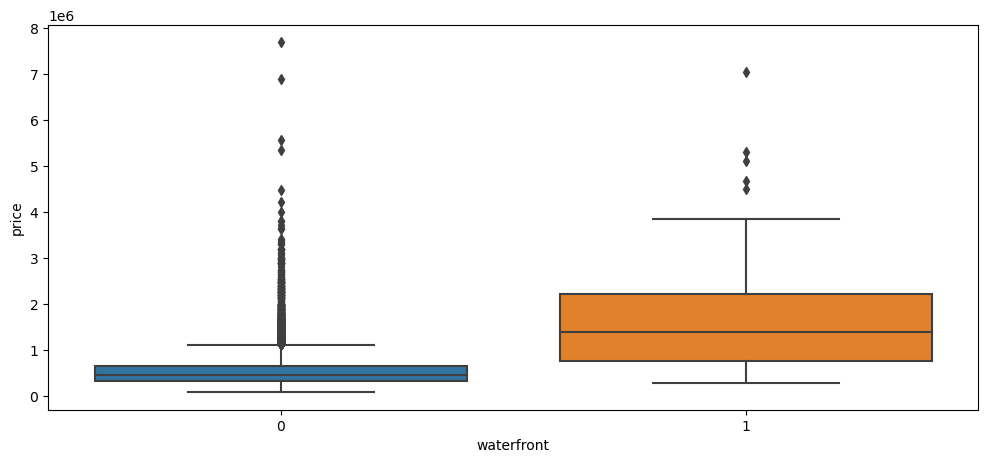

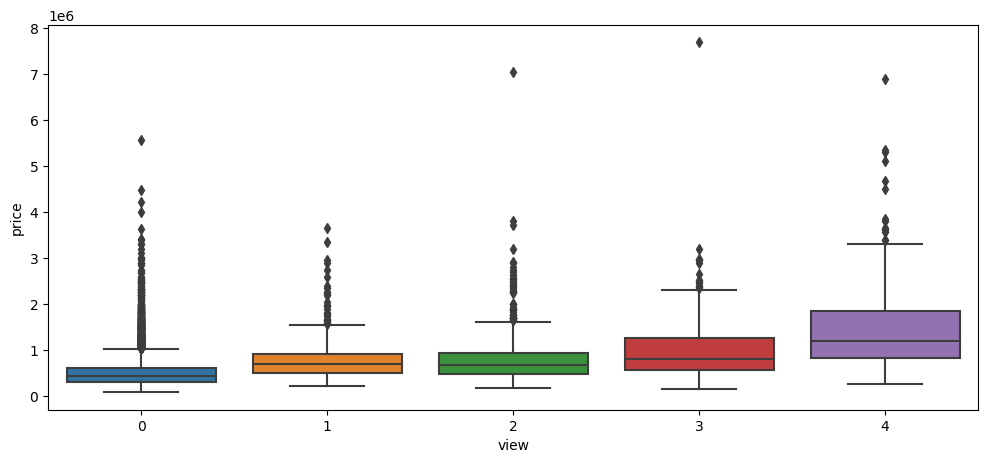

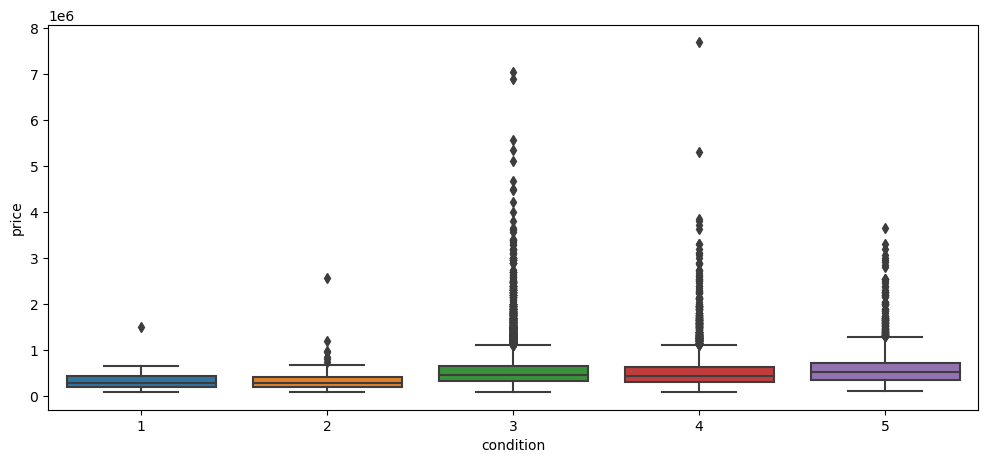

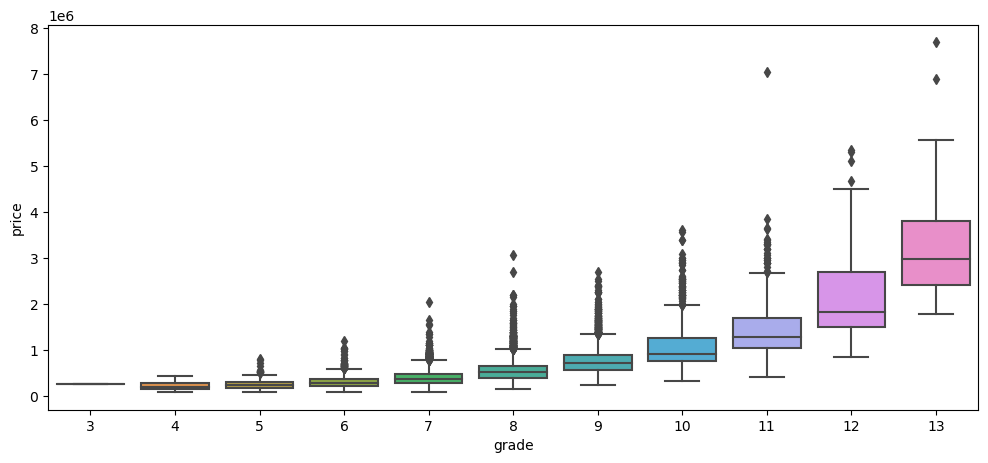

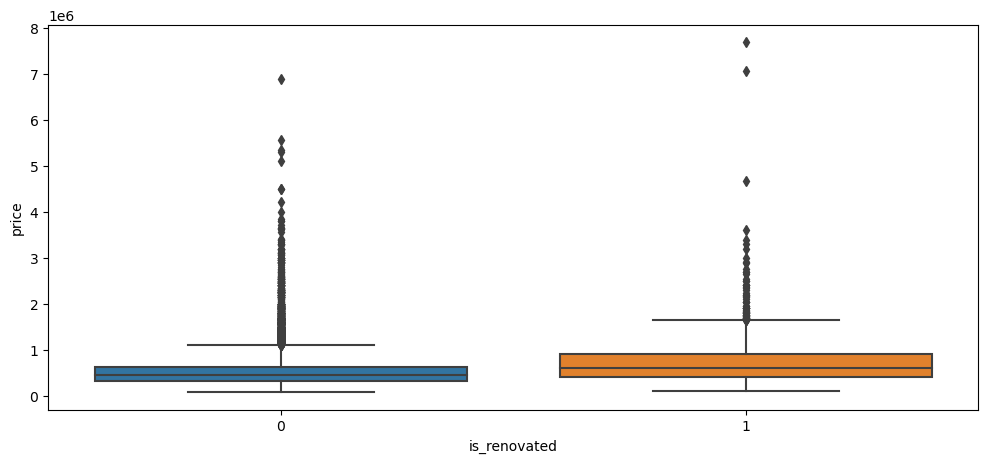

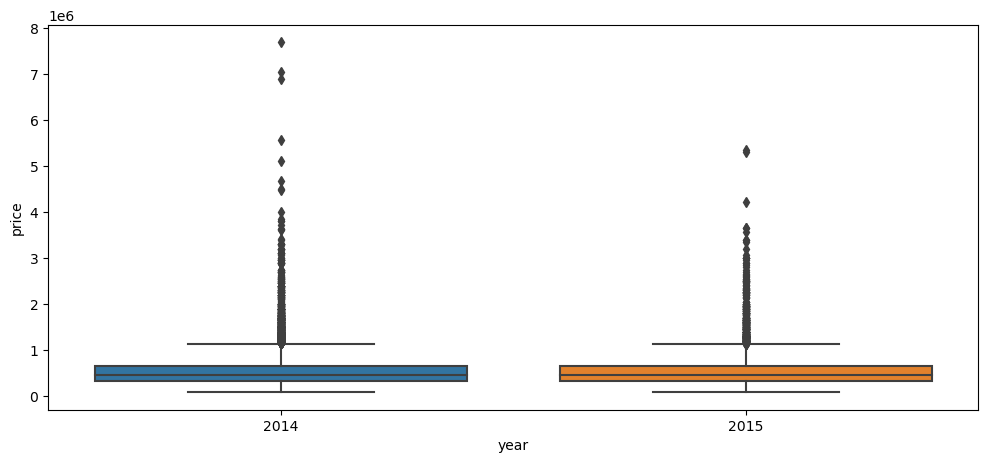

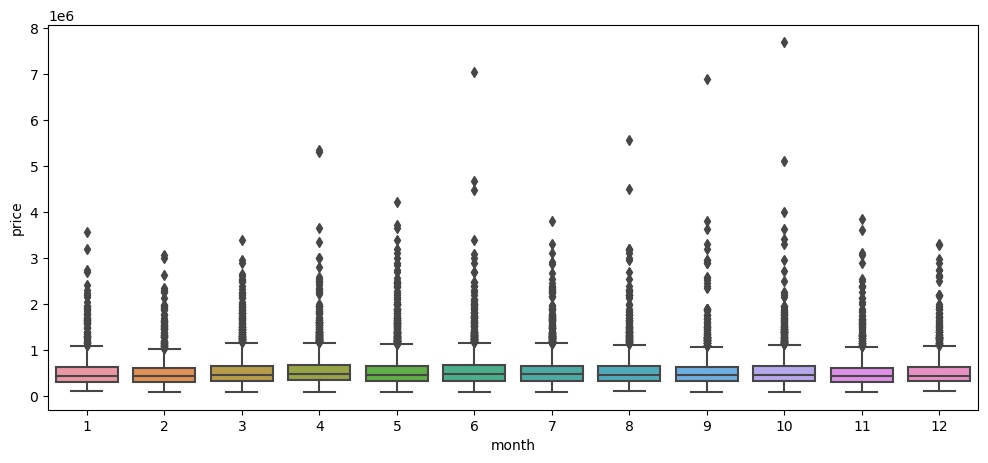

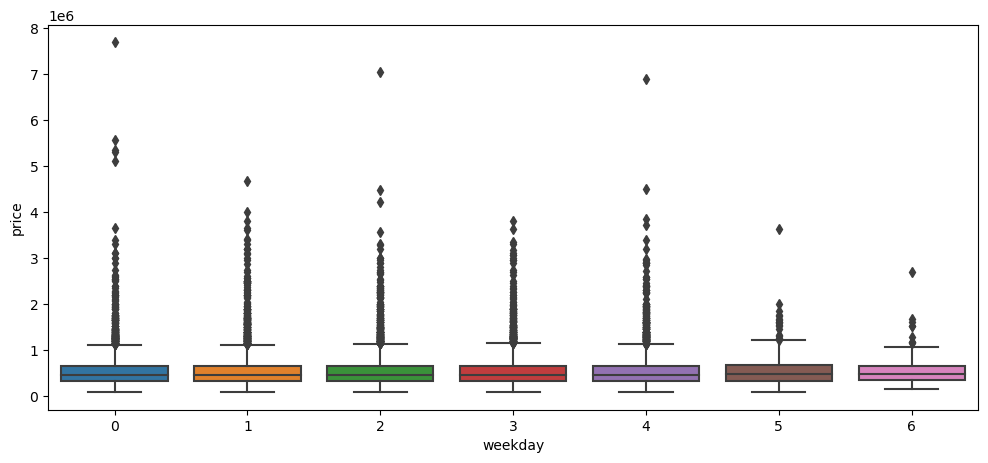

In [74]:
for col in categorical.columns:
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=data, x=col, y="price")
    plt.show()

### Zipcodes

In [75]:
# Group the data by zipcode to obtain the top 10 zipcodes by average price
zipcode_avg_price = data.groupby('zipcode')['price'].mean().reset_index()
top_10_zipcodes = zipcode_avg_price.sort_values(by='price', ascending=False).head(10)

zipcodes = list(top_10_zipcodes['zipcode'])
zipcodes

[98039, 98004, 98040, 98112, 98102, 98109, 98105, 98006, 98119, 98005]

In [76]:
# The same with high value properties
zipcode_avg_price_hv = high_value.groupby('zipcode')['price'].mean().reset_index()
top_10_zipcodes_hv = zipcode_avg_price_hv.sort_values(by='price', ascending=False).head(10)

zipcodes_hv = list(top_10_zipcodes_hv['zipcode'])
zipcodes_hv

[98039, 98004, 98112, 98040, 98102, 98105, 98144, 98034, 98023, 98006]

Let's replace zipcodes by neighbourhood. Source: www.unitedstateszipcodes.org

In [77]:
zipcodes_total = zipcodes + zipcodes_hv
zipcodes_total = list(dict.fromkeys(zipcodes_total))

In [78]:
zip_to_neigh = {
    98039: 'Medina',
    98004: 'Bellevue',
    98040: 'Mercer Island',
    98112: 'Mann|Central Area',
    98102: 'Eastlake|Cascade',
    98109: 'Westlake|Cascade',
    98105: 'University District',
    98006: 'Eaglesmere',
    98119: 'West Queen Anne|Queen Anne',
    98005: 'Wilburton',
    98144: 'Atlantic|Central Area',
    98034: 'Kirkland',
    98023: 'Federal Way'
}

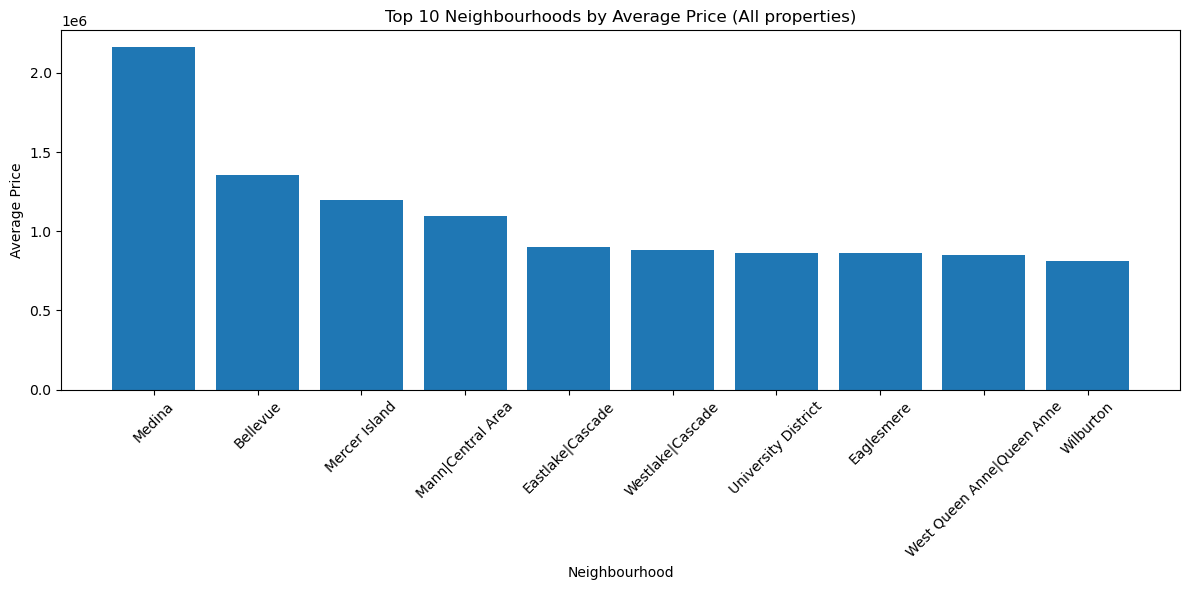

In [79]:
# Replace zip codes with neighbourhood names
top_10_zipcodes['zipcode'] = top_10_zipcodes['zipcode'].replace(zip_to_neigh)

# Create a bar plot to visualize the top 10 neighbourhoods by average price
plt.figure(figsize=(12, 6))
plt.bar(top_10_zipcodes['zipcode'], top_10_zipcodes['price'])
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Top 10 Neighbourhoods by Average Price (All properties)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

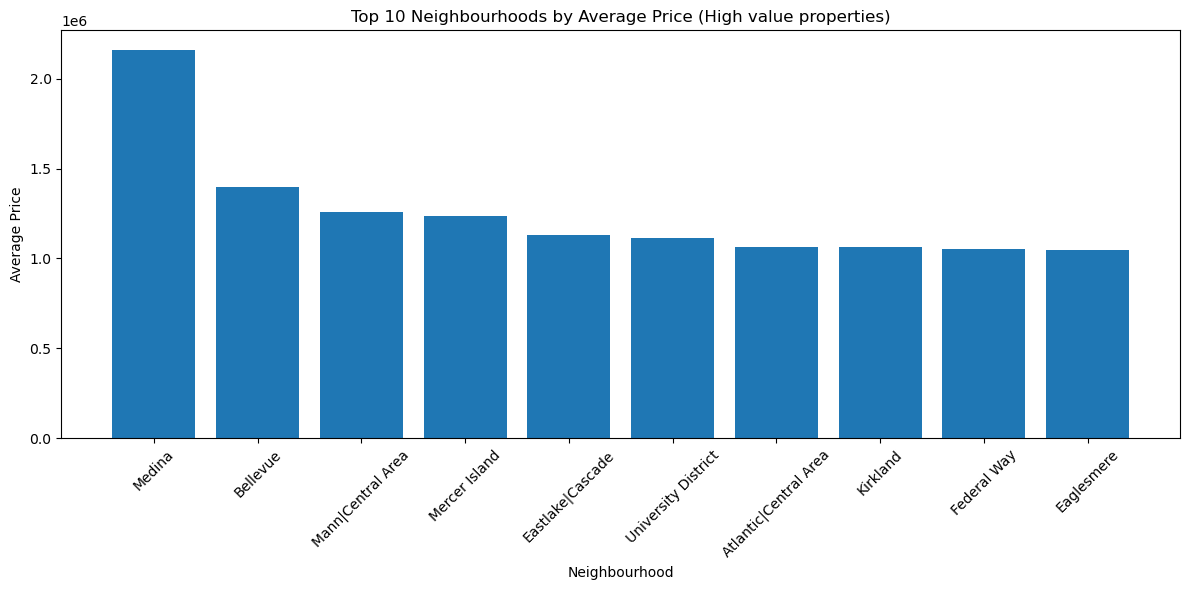

In [80]:
# Replace zip codes with neighbourhood names
top_10_zipcodes_hv['zipcode'] = top_10_zipcodes_hv['zipcode'].replace(zip_to_neigh)

# Create a bar plot to visualize the top 10 neighbourhoods by average price
plt.figure(figsize=(12, 6))
plt.bar(top_10_zipcodes_hv['zipcode'], top_10_zipcodes_hv['price'])
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Top 10 Neighbourhoods by Average Price (High value properties)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation matrix

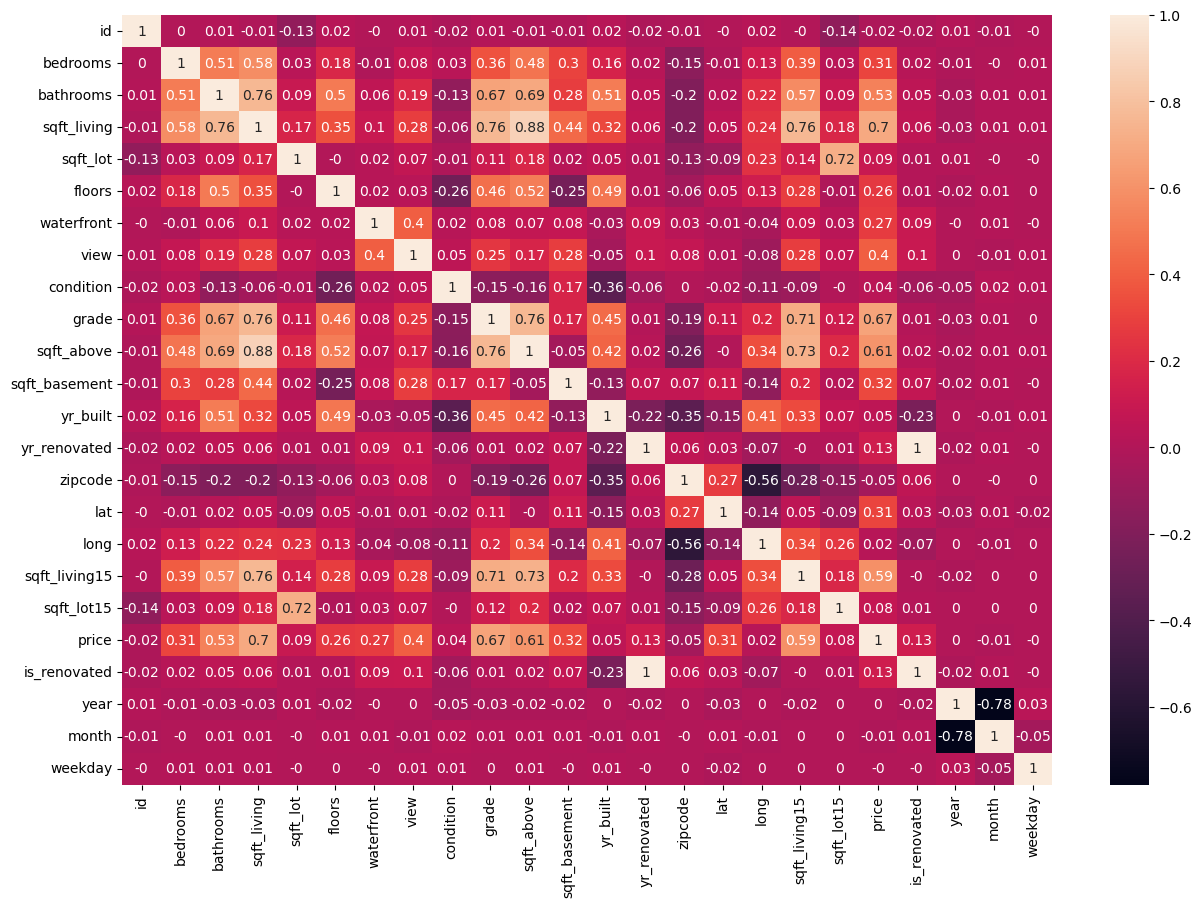

In [81]:
mask = np.zeros_like(data.corr())
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(round(data.corr(), 2), mask=mask, annot=True)
plt.show()

For the feature selection prior to modeling, we look for features that have high correlation with the target (price), and at the same time, we want to avoid multicolinearity between independent features. 
- Price: there is a high correlation with sqft_living (0.7) and grade (0.67). Other significant features are sqft_above (0.61), sqft_living15 (0.59), bathrooms (0.53), view (0.4), sqft_basement (0.32), bedrooms (0.31), lat (0.31), waterfront (0.27), floors (0.26). Interestingly, features like the condition or the area of the lot do not seem to have a correlation with price.
- Consider to drop features with very low correlation with target: condition, yr_built, zipcode, long, year, month, weekday, sqft_lot.
- There is a high correlation between sqft_living and sqft_above, bathrooms, grade and sqft_living15, and quite high with bedrooms. Consider to drop this columns.
- Grade is correlated with bathrooms, sqft_living, year built, floors.
- Consider to drop sqft_living15 and sqft_lot15 since they are correlated with sqft_living and sqft_lot and are less correlated than the last two to price.

In [82]:
corr_drop = ["condition", "yr_built", "zipcode", "long", "year", "month", "weekday", "sqft_lot",
             "bathrooms", "grade", "sqft_living15", "bedrooms", "sqft_lot15"]

drop_cols += corr_drop
drop_cols

['id',
 'sqft_above',
 'sqft_basement',
 'condition',
 'yr_built',
 'zipcode',
 'long',
 'year',
 'month',
 'weekday',
 'sqft_lot',
 'bathrooms',
 'grade',
 'sqft_living15',
 'bedrooms',
 'sqft_lot15']

## Export the data

In [86]:
data.to_csv("data.csv", index=False)

In [87]:
drop_cols_df = pd.DataFrame(drop_cols)
drop_cols_df

0
0              id
1      sqft_above
2   sqft_basement
3       condition
4        yr_built
5         zipcode
6            long
7            year
8           month
9         weekday
10       sqft_lot
11      bathrooms
12          grade
13  sqft_living15
14       bedrooms
15     sqft_lot15

In [88]:
drop_cols_df.to_csv("drop_cols.csv")